<a href="https://colab.research.google.com/github/314sirius/linked-in/blob/main/Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 13.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import emoji

from wordcloud import WordCloud,STOPWORDS

# Data cleaning

In [ ]:
from google.colab import files

In [ ]:
#if web scraping is done use comments_author.csv
#else upload Comments.csv file here
uploaded=files.upload()

Saving comments_author.csv to comments_author (1).csv


In [ ]:
#if web scraping is done use comments_author.csv
df = pd.read_csv('comments_author.csv', on_bad_lines='skip', encoding = 'utf-8') #or use 'Comments.csv' if sentiment wasn't done
df.head(2)

Unnamed: 0                 Date  \
0           0  2025-12-28 20:42:47   
1           1  2025-12-28 11:26:01   

                                                Link  \
0  https://www.linkedin.com/feed/update/urn%3Ali%...   
1  https://www.linkedin.com/feed/update/urn%3Ali%...   

                                             Message  \
0  Assuming Finland has 10 is a bold statement, g...   
1  Buying houseplant and investing in wool socks ...   

                                     Cleaned_Message  Length  emoji_number  \
0  assuming finland has 10 is a bold statement gi...      92             0   
1  buying houseplant and investing in wool socks ...      67             1   

                                     Message_no_link         Author  \
0  Assuming Finland has 10 is a bold statement, g...  The Economist   
1  Buying houseplant and investing in wool socks ...   Kobi Omenaka   

                                                Post  
0  The most rigorous studies of loneliness have l...  
1  I don‚Äôt mean to brag, but I beat all my 2025...

In [ ]:
df.shape

(8776, 10)

In [ ]:
# Convert 'Date' column to datetime, dropping rows with invalid dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])


In [ ]:
df.shape


(8776, 10)

In [ ]:
df = df.reset_index(drop=True)

In [ ]:
df.head(5)

Unnamed: 0                Date  \
0           0 2025-12-28 20:42:47   
1           1 2025-12-28 11:26:01   
2           2 2025-12-28 11:11:52   
3           3 2025-12-28 09:40:31   
4           4 2025-12-26 14:28:11   

                                                Link  \
0  https://www.linkedin.com/feed/update/urn%3Ali%...   
1  https://www.linkedin.com/feed/update/urn%3Ali%...   
2  https://www.linkedin.com/feed/update/urn%3Ali%...   
3  https://www.linkedin.com/feed/update/urn%3Ali%...   
4  https://www.linkedin.com/feed/update/urn%3Ali%...   

                                             Message  \
0  Assuming Finland has 10 is a bold statement, g...   
1  Buying houseplant and investing in wool socks ...   
2  Fake news, Nokia is the same shitty as other b...   
3  Benji F. Well... 20% of Latvians abandoned cou...   
4          Alexandra S. in foreseeable future, sure.   

                                     Cleaned_Message  Length  emoji_number  \
0  assuming finland has 10 is a bold statement gi...      92             0   
1  buying houseplant and investing in wool socks ...      67             1   
2  fake news nokia is the same shitty as other br...     116             0   
3  benji f well 20 of latvians abandoned country ...     166             0   
4             alexandra s in foreseeable future sure      38             0   

                                     Message_no_link             Author  \
0  Assuming Finland has 10 is a bold statement, g...      The Economist   
1  Buying houseplant and investing in wool socks ...       Kobi Omenaka   
2  Fake news, Nokia is the same shitty as other b...  Michael Kisilenko   
3  Benji F. Well... 20% of Latvians abandoned cou...   Daniel Berk üêù   
4          Alexandra S. in foreseeable future, sure.           Julia G.   

                                                Post  
0  The most rigorous studies of loneliness have l...  
1  I don‚Äôt mean to brag, but I beat all my 2025...  
2  Sometimes it feels like the entire industry is...  
3  If someone gave you $100 million but you had t...  
4  Last week I had 2 job interviews, interestingl...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8776 entries, 0 to 8775
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       8776 non-null   int64         
 1   Date             8776 non-null   datetime64[ns]
 2   Link             8776 non-null   object        
 3   Message          8761 non-null   object        
 4   Cleaned_Message  8561 non-null   object        
 5   Length           8776 non-null   int64         
 6   emoji_number     8776 non-null   int64         
 7   Message_no_link  8632 non-null   object        
 8   Author           8111 non-null   object        
 9   Post             8111 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 685.8+ KB


# Text preprocessing

In [ ]:
import re

def preprocess_text(text):
    """Preprocesses text for sentiment analysis."""
    if not isinstance(text, str):  # Handle non-string inputs
        return ""

    # Lowercasing
    text = text.lower()

    # Removing URLs
    text = re.sub(r'http\S+', '', text)

    # Removing mentions (@usernames)
    text = re.sub(r'@\w+', '', text)

    # Removing hashtags (#hashtags) -  Decide if you want to keep or remove
    text = re.sub(r'#\w+', '', text)

    # Removing special characters and punctuation (except for spaces)
    text = re.sub(r'[^\w\s]', '', text)

    # Removing extra whitespace
    text = ' '.join(text.split())

    return text


# Apply the preprocessing function to the 'ShareCommentary' column
df['Cleaned_Message'] = df['Message'].apply(preprocess_text)

In [ ]:
df['Cleaned_Post'] = df['Post'].apply(preprocess_text)

In [ ]:
df.head(2)

Date                                               Link  \
0 2025-12-28 20:42:47  https://www.linkedin.com/feed/update/urn%3Ali%...   
1 2025-12-28 11:26:01  https://www.linkedin.com/feed/update/urn%3Ali%...   

                                             Message  \
0  Assuming Finland has 10 is a bold statement, g...   
1  Buying houseplant and investing in wool socks ...   

                                     Cleaned_Message  
0  assuming finland has 10 is a bold statement gi...  
1  buying houseplant and investing in wool socks ...

In [ ]:
# calculate the length of cleaned_message
df['Length'] = df['Cleaned_Message'].str.len().fillna(0).astype(int)


In [ ]:
df.head(2)

Unnamed: 0                Date  \
0           0 2025-12-28 20:42:47   
1           1 2025-12-28 11:26:01   

                                                Link  \
0  https://www.linkedin.com/feed/update/urn%3Ali%...   
1  https://www.linkedin.com/feed/update/urn%3Ali%...   

                                             Message  \
0  Assuming Finland has 10 is a bold statement, g...   
1  Buying houseplant and investing in wool socks ...   

                                     Cleaned_Message  Length  emoji_number  \
0  assuming finland has 10 is a bold statement gi...      92             0   
1  buying houseplant and investing in wool socks ...      67             1   

                                     Message_no_link         Author  \
0  Assuming Finland has 10 is a bold statement, g...  The Economist   
1  Buying houseplant and investing in wool socks ...   Kobi Omenaka   

                                                Post  \
0  The most rigorous studies of loneliness have l...   
1  I don‚Äôt mean to brag, but I beat all my 2025...   

                                        Cleaned_Post  
0  the most rigorous studies of loneliness have l...  
1  i donäôt mean to brag but i beat all my 2025 g...

# Plots

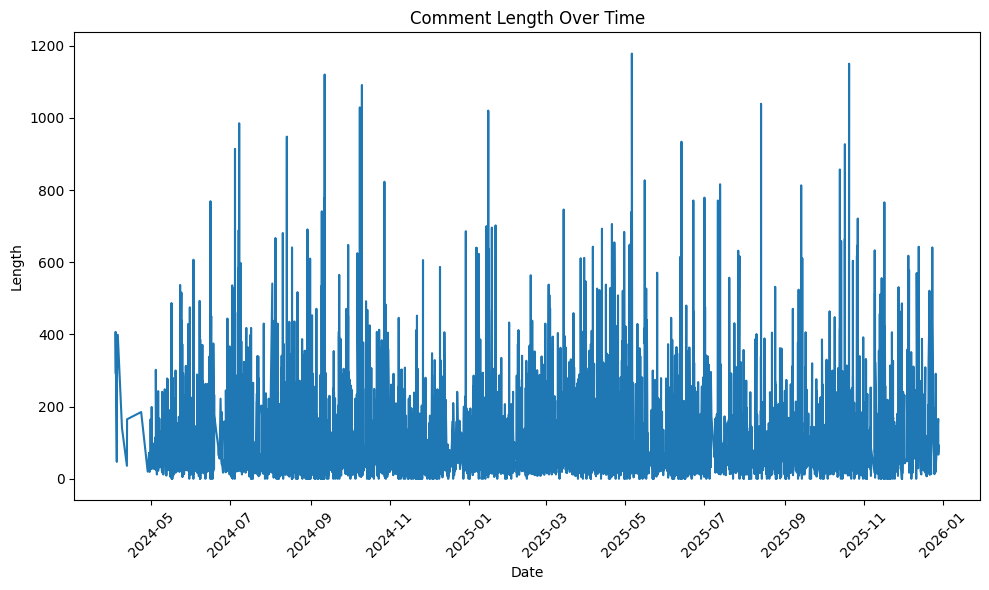

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(df['Date'], df['Length'])
plt.xlabel('Date')
plt.ylabel('Length')
plt.title('Comment Length Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# calculates daily comment lengths
daily_message_length = df.groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()

# Print the result
daily_message_length


Date
2024-04-03    701
2024-04-04    306
2024-04-05    399
2024-04-06      0
2024-04-07      0
             ... 
2025-12-24    100
2025-12-25    590
2025-12-26    728
2025-12-27      0
2025-12-28    441
Freq: D, Name: Length, Length: 635, dtype: int64

# daily message's length


In [ ]:
# Check for missing dates in daily_message_length
date_range = pd.date_range(start=daily_message_length.index.min(), end=daily_message_length.index.max(), freq='D')
missing_dates = date_range.difference(daily_message_length.index)

if missing_dates.empty:
    print("No missing dates found in daily_message_length.")
else:
    print("Missing dates indaily_message_length:")
missing_dates


No missing dates found in daily_message_length.


DatetimeIndex([], dtype='datetime64[ns]', freq='D')

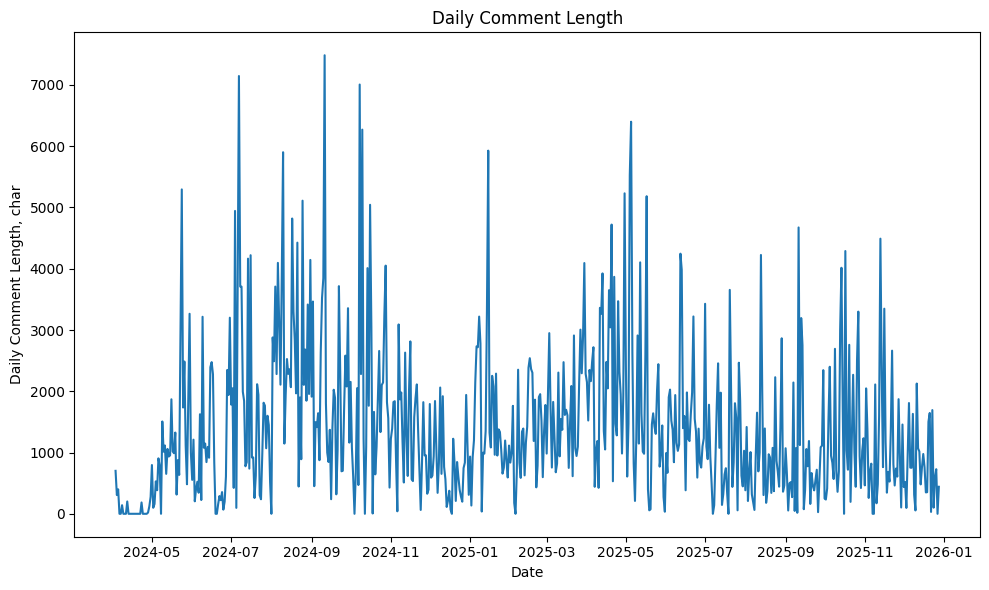

In [ ]:
#plot daily comment lengths
plt.figure(figsize=(10, 6))
plt.plot(daily_message_length.index, daily_message_length.values)
plt.xlabel('Date')
plt.ylabel('Daily Comment Length, char')
plt.title('Daily Comment Length')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
#calculate daily comment count
daily_message_count = df.groupby(pd.Grouper(key='Date', freq='d'))['Message'].count()

# Print the result
daily_message_count

Date
2024-04-03    2
2024-04-04    2
2024-04-05    1
2024-04-06    0
2024-04-07    0
             ..
2025-12-24    1
2025-12-25    7
2025-12-26    6
2025-12-27    0
2025-12-28    4
Freq: D, Name: Message, Length: 635, dtype: int64

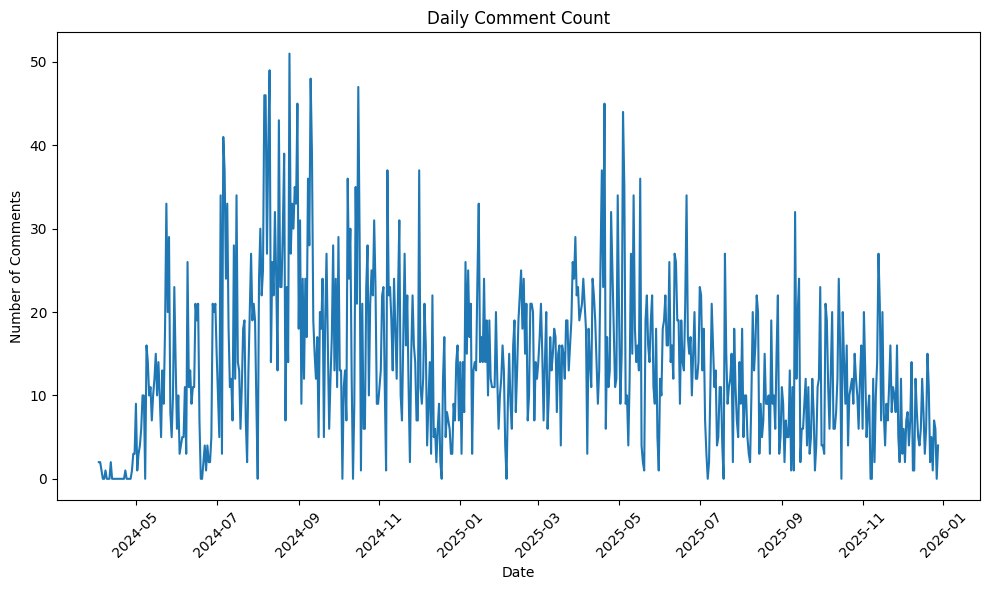

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(daily_message_count.index, daily_message_count.values)
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.title('Daily Comment Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Emoji count

In [ ]:
# count emoji in comments

def count_emoji(text):
  #text=str(text)
  emoji_count = 0
  for char in text:
    if emoji.is_emoji(char):
      emoji_count += 1
  return emoji_count


df['Message'] = df['Message'].astype(str)

df['emoji_number'] = df['Message'].apply(count_emoji)


In [ ]:
count_emoji(df['Message'][2])

0

In [ ]:
df.head(5)

Unnamed: 0                Date  \
0           0 2025-12-28 20:42:47   
1           1 2025-12-28 11:26:01   
2           2 2025-12-28 11:11:52   
3           3 2025-12-28 09:40:31   
4           4 2025-12-26 14:28:11   

                                                Link  \
0  https://www.linkedin.com/feed/update/urn%3Ali%...   
1  https://www.linkedin.com/feed/update/urn%3Ali%...   
2  https://www.linkedin.com/feed/update/urn%3Ali%...   
3  https://www.linkedin.com/feed/update/urn%3Ali%...   
4  https://www.linkedin.com/feed/update/urn%3Ali%...   

                                             Message  \
0  Assuming Finland has 10 is a bold statement, g...   
1  Buying houseplant and investing in wool socks ...   
2  Fake news, Nokia is the same shitty as other b...   
3  Benji F. Well... 20% of Latvians abandoned cou...   
4          Alexandra S. in foreseeable future, sure.   

                                     Cleaned_Message  Length  emoji_number  \
0  assuming finland has 10 is a bold statement gi...      92             0   
1  buying houseplant and investing in wool socks ...      67             1   
2  fake news nokia is the same shitty as other br...     116             0   
3  benji f well 20 of latvians abandoned country ...     166             0   
4             alexandra s in foreseeable future sure      38             0   

                                     Message_no_link             Author  \
0  Assuming Finland has 10 is a bold statement, g...      The Economist   
1  Buying houseplant and investing in wool socks ...       Kobi Omenaka   
2  Fake news, Nokia is the same shitty as other b...  Michael Kisilenko   
3  Benji F. Well... 20% of Latvians abandoned cou...   Daniel Berk üêù   
4          Alexandra S. in foreseeable future, sure.           Julia G.   

                                                Post  \
0  The most rigorous studies of loneliness have l...   
1  I don‚Äôt mean to brag, but I beat all my 2025...   
2  Sometimes it feels like the entire industry is...   
3  If someone gave you $100 million but you had t...   
4  Last week I had 2 job interviews, interestingl...   

                                        Cleaned_Post  
0  the most rigorous studies of loneliness have l...  
1  i donäôt mean to brag but i beat all my 2025 g...  
2  sometimes it feels like the entire industry is...  
3  if someone gave you 100 million but you had to...  
4  last week i had 2 job interviews interestingly...

In [ ]:
# raw comments without links
import re

def remove_links(text):
  """Removes links from a given text string."""
  return re.sub(r'http\S+', '', text)

# Apply the function to the 'Message' column
df['Message_no_link'] = df['Message'].apply(remove_links)


In [ ]:
df


Unnamed: 0                Date  \
0              0 2025-12-28 20:42:47   
1              1 2025-12-28 11:26:01   
2              2 2025-12-28 11:11:52   
3              3 2025-12-28 09:40:31   
4              4 2025-12-26 14:28:11   
...          ...                 ...   
8771        8771 2024-04-05 05:36:50   
8772        8772 2024-04-04 11:50:47   
8773        8773 2024-04-04 11:18:56   
8774        8774 2024-04-03 13:15:02   
8775        8775 2024-04-03 12:30:09   

                                                   Link  \
0     https://www.linkedin.com/feed/update/urn%3Ali%...   
1     https://www.linkedin.com/feed/update/urn%3Ali%...   
2     https://www.linkedin.com/feed/update/urn%3Ali%...   
3     https://www.linkedin.com/feed/update/urn%3Ali%...   
4     https://www.linkedin.com/feed/update/urn%3Ali%...   
...                                                 ...   
8771  https://www.linkedin.com/feed/update/urn%3Ali%...   
8772  https://www.linkedin.com/feed/update/urn%3Ali%...   
8773  https://www.linkedin.com/feed/update/urn%3Ali%...   
8774  https://www.linkedin.com/feed/update/urn%3Ali%...   
8775  https://www.linkedin.com/feed/update/urn%3Ali%...   

                                                Message  \
0     Assuming Finland has 10 is a bold statement, g...   
1     Buying houseplant and investing in wool socks ...   
2     Fake news, Nokia is the same shitty as other b...   
3     Benji F. Well... 20% of Latvians abandoned cou...   
4             Alexandra S. in foreseeable future, sure.   
...                                                 ...   
8771  George, проблема ведь в том, что у психопата, ...   
8772  психопаты - идеальные хищники, использующие ми...   
8773    И обычно чем длиннее список тем меньше зарплата   
8774  Добавлю ещё, что эволюция не поощряет объектив...   
8775  Чтоб оставаться объективным нужно затрачивать ...   

                                        Cleaned_Message  Length  emoji_number  \
0     assuming finland has 10 is a bold statement gi...      92             0   
1     buying houseplant and investing in wool socks ...      67             1   
2     fake news nokia is the same shitty as other br...     116             0   
3     benji f well 20 of latvians abandoned country ...     166             0   
4                alexandra s in foreseeable future sure      38             0   
...                                                 ...     ...           ...   
8771  george проблема ведь в том что у психопата кот...     399             0   
8772  психопаты идеальные хищники использующие мимик...     259             0   
8773    и обычно чем длиннее список тем меньше зарплата      47             0   
8774  добавлю ещё что эволюция не поощряет объективн...     407             0   
8775  чтоб оставаться объективным нужно затрачивать ...     294             0   

                                        Message_no_link  \
0     Assuming Finland has 10 is a bold statement, g...   
1     Buying houseplant and investing in wool socks ...   
2     Fake news, Nokia is the same shitty as other b...   
3     Benji F. Well... 20% of Latvians abandoned cou...   
4             Alexandra S. in foreseeable future, sure.   
...                                                 ...   
8771  George, проблема ведь в том, что у психопата, ...   
8772  психопаты - идеальные хищники, использующие ми...   
8773    И обычно чем длиннее список тем меньше зарплата   
8774  Добавлю ещё, что эволюция не поощряет объектив...   
8775  Чтоб оставаться объективным нужно затрачивать ...   

                             Author  \
0                     The Economist   
1                      Kobi Omenaka   
2                 Michael Kisilenko   
3                  Daniel Berk üêù   
4                          Julia G.   
...                             ...   
8771  –ú–∞–π–∫ –¢–æ—Ä—á–∏–Ω—Å–∫–∏–π   
8772  –ú–∞–π–∫ –¢–æ—Ä—á–∏–Ω—Å–∫–∏–π   
8773  –ú–∞–π–∫ –¢–æ—Ä—á–∏–Ω—Å–∫–∏–π   
8774  –ú–∞–π–∫ –¢–æ—Ä—á–∏–Ω—Å–∫–∏–π

# Web scrapping: Done

## Do only once and save the csv file as comments_authors.csv

In [ ]:
df

Date                                               Link  \
0    2025-12-28 20:42:47  https://www.linkedin.com/feed/update/urn%3Ali%...   
1    2025-12-28 11:26:01  https://www.linkedin.com/feed/update/urn%3Ali%...   
2    2025-12-28 11:11:52  https://www.linkedin.com/feed/update/urn%3Ali%...   
3    2025-12-28 09:40:31  https://www.linkedin.com/feed/update/urn%3Ali%...   
4    2025-12-26 14:28:11  https://www.linkedin.com/feed/update/urn%3Ali%...   
...                  ...                                                ...   
8771 2024-04-05 05:36:50  https://www.linkedin.com/feed/update/urn%3Ali%...   
8772 2024-04-04 11:50:47  https://www.linkedin.com/feed/update/urn%3Ali%...   
8773 2024-04-04 11:18:56  https://www.linkedin.com/feed/update/urn%3Ali%...   
8774 2024-04-03 13:15:02  https://www.linkedin.com/feed/update/urn%3Ali%...   
8775 2024-04-03 12:30:09  https://www.linkedin.com/feed/update/urn%3Ali%...   

                                                Message  \
0     Assuming Finland has 10 is a bold statement, g...   
1     Buying houseplant and investing in wool socks ...   
2     Fake news, Nokia is the same shitty as other b...   
3     Benji F. Well... 20% of Latvians abandoned cou...   
4             Alexandra S. in foreseeable future, sure.   
...                                                 ...   
8771  George, проблема ведь в том, что у психопата, ...   
8772  психопаты - идеальные хищники, использующие ми...   
8773    И обычно чем длиннее список тем меньше зарплата   
8774  Добавлю ещё, что эволюция не поощряет объектив...   
8775  Чтоб оставаться объективным нужно затрачивать ...   

                                        Cleaned_Message  Length  emoji_number  \
0     assuming finland has 10 is a bold statement gi...      92             0   
1     buying houseplant and investing in wool socks ...      67             1   
2     fake news nokia is the same shitty as other br...     116             0   
3     benji f well 20 of latvians abandoned country ...     166             0   
4                alexandra s in foreseeable future sure      38             0   
...                                                 ...     ...           ...   
8771  george проблема ведь в том что у психопата кот...     399             0   
8772  психопаты идеальные хищники использующие мимик...     259             0   
8773    и обычно чем длиннее список тем меньше зарплата      47             0   
8774  добавлю ещё что эволюция не поощряет объективн...     407             0   
8775  чтоб оставаться объективным нужно затрачивать ...     294             0   

                                        Message_no_link  
0     Assuming Finland has 10 is a bold statement, g...  
1     Buying houseplant and investing in wool socks ...  
2     Fake news, Nokia is the same shitty as other b...  
3     Benji F. Well... 20% of Latvians abandoned cou...  
4             Alexandra S. in foreseeable future, sure.  
...                                                 ...  
8771  George, проблема ведь в том, что у психопата, ...  
8772  психопаты - идеальные хищники, использующие ми...  
8773    И обычно чем длиннее список тем меньше зарплата  
8774  Добавлю ещё, что эволюция не поощряет объектив...  
8775  Чтоб оставаться объективным нужно затрачивать ...  

[8776 rows x 7 columns]

In [ ]:
# Use this to web scrap

import time
import random

import requests
from bs4 import BeautifulSoup

def get_author_and_text(link):
    try:
        # Introduce a random delay between 2 and 5 seconds
        #delay = random.uniform(2, 5)
        #time.sleep(delay)

        response = requests.get(link)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')
        author_element = soup.find('div', class_='text-color-text')
        if author_element:
            author = author_element.text.strip() # Extract author
            text_element = soup.find('div', class_='attributed-text-segment-list__container relative mt-1 mb-1.5 babybear:mt-0 babybear:mb-0.5') # Extract post text
            if text_element:
                text = text_element.get_text(strip=True)
            else:
                text = "Text not found"
            return author, text
        else:
            return "Author not found", "Text not found"
    except Exception as e:
        print(f"Error processing {link}: {e}")
        return np.nan, np.nan # Return NaN for both author and text in case of error

# Example usage (assuming df500 and 'Link' column exist):
# Apply the function with a delay

In [ ]:
#test if it works on first link
get_author_and_text(df['Link'][0])

('The Economist',
 'The most rigorous studies of loneliness have largely been in Europe and America. But the loneliest place of all is Madagascar. Our correspondent went there to find out whyecon.st/4rYBlNr')

In [ ]:
author_text_data = df['Link'].apply(get_author_and_text)

# Split the tuple into two columns
df[['Author', 'Post']] = pd.DataFrame(author_text_data.tolist(), index=df.index)

Error processing https://www.linkedin.com/feed/update/urn%3Ali%3Aactivity%3A7408037988775133184: 404 Client Error: Not Found for url: https://www.linkedin.com/feed/update/urn%3Ali%3Aactivity%3A7408037988775133184
Error processing https://www.linkedin.com/feed/update/urn%3Ali%3AugcPost%3A7405627351428075521: 404 Client Error: Not Found for url: https://www.linkedin.com/feed/update/urn%3Ali%3AugcPost%3A7405627351428075521
Error processing https://www.linkedin.com/feed/update/urn%3Ali%3AugcPost%3A7399485661382209536: 404 Client Error: Not Found for url: https://www.linkedin.com/feed/update/urn%3Ali%3AugcPost%3A7399485661382209536
Error processing https://www.linkedin.com/feed/update/urn%3Ali%3Aactivity%3A7390369027933655040: 404 Client Error: Not Found for url: https://www.linkedin.com/feed/update/urn%3Ali%3Aactivity%3A7390369027933655040
Error processing https://www.linkedin.com/feed/update/urn%3Ali%3Aactivity%3A7393622082812682240: 404 Client Error: Not Found for url: https://www.linked

In [ ]:
df

Date                                               Link  \
0    2025-12-28 20:42:47  https://www.linkedin.com/feed/update/urn%3Ali%...   
1    2025-12-28 11:26:01  https://www.linkedin.com/feed/update/urn%3Ali%...   
2    2025-12-28 11:11:52  https://www.linkedin.com/feed/update/urn%3Ali%...   
3    2025-12-28 09:40:31  https://www.linkedin.com/feed/update/urn%3Ali%...   
4    2025-12-26 14:28:11  https://www.linkedin.com/feed/update/urn%3Ali%...   
...                  ...                                                ...   
8771 2024-04-05 05:36:50  https://www.linkedin.com/feed/update/urn%3Ali%...   
8772 2024-04-04 11:50:47  https://www.linkedin.com/feed/update/urn%3Ali%...   
8773 2024-04-04 11:18:56  https://www.linkedin.com/feed/update/urn%3Ali%...   
8774 2024-04-03 13:15:02  https://www.linkedin.com/feed/update/urn%3Ali%...   
8775 2024-04-03 12:30:09  https://www.linkedin.com/feed/update/urn%3Ali%...   

                                                Message  \
0     Assuming Finland has 10 is a bold statement, g...   
1     Buying houseplant and investing in wool socks ...   
2     Fake news, Nokia is the same shitty as other b...   
3     Benji F. Well... 20% of Latvians abandoned cou...   
4             Alexandra S. in foreseeable future, sure.   
...                                                 ...   
8771  George, проблема ведь в том, что у психопата, ...   
8772  психопаты - идеальные хищники, использующие ми...   
8773    И обычно чем длиннее список тем меньше зарплата   
8774  Добавлю ещё, что эволюция не поощряет объектив...   
8775  Чтоб оставаться объективным нужно затрачивать ...   

                                        Cleaned_Message  Length  emoji_number  \
0     assuming finland has 10 is a bold statement gi...      92             0   
1     buying houseplant and investing in wool socks ...      67             1   
2     fake news nokia is the same shitty as other br...     116             0   
3     benji f well 20 of latvians abandoned country ...     166             0   
4                alexandra s in foreseeable future sure      38             0   
...                                                 ...     ...           ...   
8771  george проблема ведь в том что у психопата кот...     399             0   
8772  психопаты идеальные хищники использующие мимик...     259             0   
8773    и обычно чем длиннее список тем меньше зарплата      47             0   
8774  добавлю ещё что эволюция не поощряет объективн...     407             0   
8775  чтоб оставаться объективным нужно затрачивать ...     294             0   

                                        Message_no_link  \
0     Assuming Finland has 10 is a bold statement, g...   
1     Buying houseplant and investing in wool socks ...   
2     Fake news, Nokia is the same shitty as other b...   
3     Benji F. Well... 20% of Latvians abandoned cou...   
4             Alexandra S. in foreseeable future, sure.   
...                                                 ...   
8771  George, проблема ведь в том, что у психопата, ...   
8772  психопаты - идеальные хищники, использующие ми...   
8773    И обычно чем длиннее список тем меньше зарплата   
8774  Добавлю ещё, что эволюция не поощряет объектив...   
8775  Чтоб оставаться объективным нужно затрачивать ...   

                             Author  \
0                     The Economist   
1                      Kobi Omenaka   
2                 Michael Kisilenko   
3                  Daniel Berk üêù   
4                          Julia G.   
...                             ...   
8771  –ú–∞–π–∫ –¢–æ—Ä—á–∏–Ω—Å–∫–∏–π   
8772  –ú–∞–π–∫ –¢–æ—Ä—á–∏–Ω—Å–∫–∏–π   
8773  –ú–∞–π–∫ –¢–æ—Ä—á–∏–Ω—Å–∫–∏–π   
8774  –ú–∞–π–∫ –¢–æ—Ä—á–∏–Ω—Å–∫–∏–π   
8775  –ú–∞–π–∫ –¢–æ—Ä—á–∏–Ω—Å–∫–∏–π   

                                                   Post  
0     The most rigorous studies of loneliness have l...  
1     I don‚Äôt mean to brag, but I beat all my 2025...  
2     Sometimes it feels like the ent

In [ ]:
df.to_csv('comments_author.csv', encoding = 'utf-8')
files.download('comments_author.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Analysis of comments length by author

In [ ]:
emoji.demojize('Sven Dolahsek after watchi less convinced they will save us. 😂')

'Sven Dolahsek after watchi less convinced they will save us. :face_with_tears_of_joy:'

# Sentiment analysis: Done

In [ ]:
!pip install transformers
!pip install tqdm

import pandas as pd
import re
from transformers import pipeline
from tqdm import tqdm

# Assuming df and the 'Message_no_link' column are already defined as in your code

# Load the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Function to analyze sentiment with progress bar
def analyze_sentiment_with_progress(messages):
    sentiments = []
    for message in tqdm(messages, desc="Analyzing sentiment"):
      try:
        sentiments.append(sentiment_pipeline(message)[0])
      except Exception as e:
        print(f"Error analyzing: {message}. Error:{e}")
        sentiments.append({'label':'ERROR', 'score':0})
    return sentiments

# Analyze sentiment with progress bar
#df_filtered['Sentiment'] = analyze_sentiment_with_progress(df['Cleaned_Post'].astype(str))
#df_filtered

sentiment_results = analyze_sentiment_with_progress(df['Cleaned_Message'].astype(str))

df[['Sentiment_Label_message', 'Sentiment_Score_message']] = pd.DataFrame(
    [(result['label'], result['score']) for result in sentiment_results],
    index=df.index
)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu
Analyzing sentiment: 100%|██████████| 8776/8776 [11:09<00:00, 13.11it/s]


In [ ]:
sentiment_results = analyze_sentiment_with_progress(df['Cleaned_Post'].astype(str))

df[['Sentiment_Label_post', 'Sentiment_Score_post']] = pd.DataFrame(
    [(result['label'], result['score']) for result in sentiment_results],
    index=df.index
)

Analyzing sentiment:   1%|          | 61/8776 [00:30<1:26:01,  1.69it/s]

Error analyzing: good to know we did not start the fire i love the original song but this was bardcore epic lyrics enjoy üëá eleanor of aquitaine charles the 6th hath gone insane reconquista geoffrey chaucer michelangelo marco polo magna carta christian schism siege of acre byzantine iconoclasm guillaume de machaut charlemagne alfred anne boleyn without a head few things here to read but the nibelungenlied castile with aragon second pope in avignon novgorod chinggis khan beowulf decameron üî we did not start the fire it was always burning as the world was turning we did not start the fire no we did not light it but we tried to fight it üî henry tudor saladin richard and the winter king lindisfarne norse raids children on crusade rome gone castillon mona lisa king john kalmar union hanseatic trade kipchaks horseback constantinople sacked song of roland silk demand wallachia holy land grunwald manzikert barbarossa golden spurs joan of arc patriarch battle of lepanto üî we did not start t

Analyzing sentiment:   1%|          | 65/8776 [00:31<47:42,  3.04it/s]  

Error analyzing: good to know we did not start the fire i love the original song but this was bardcore epic lyrics enjoy üëá eleanor of aquitaine charles the 6th hath gone insane reconquista geoffrey chaucer michelangelo marco polo magna carta christian schism siege of acre byzantine iconoclasm guillaume de machaut charlemagne alfred anne boleyn without a head few things here to read but the nibelungenlied castile with aragon second pope in avignon novgorod chinggis khan beowulf decameron üî we did not start the fire it was always burning as the world was turning we did not start the fire no we did not light it but we tried to fight it üî henry tudor saladin richard and the winter king lindisfarne norse raids children on crusade rome gone castillon mona lisa king john kalmar union hanseatic trade kipchaks horseback constantinople sacked song of roland silk demand wallachia holy land grunwald manzikert barbarossa golden spurs joan of arc patriarch battle of lepanto üî we did not start t

Analyzing sentiment:   3%|▎         | 235/8776 [01:32<38:27,  3.70it/s]

Error analyzing: ever wondered if a 2minute tweak to your morning routine could rewire your brain for greater adaptability i stumbled upon this gem brush your teeth with your nondominant hand it challenges your brains default pathways sparking neuroplasticity and forging fresh neural connections that enhance cognitive flexibilityäîthink sharper problemsolving and resilience in highstakes projects the original sharer simply captioned it trying thisääîa powerful reminder that innovation starts with curiosity and small experiments ive committed to it for a week and already that subtle discomfort feels like a win for growth in leadership and career pivots embracing discomfort builds the mental agility we need scientific evidence while the hack is popular online research on nondominant hand use eg for brushing writing or daily tasks shows mixed but promising results for brain benefits heres a balanced overview drawing from peerreviewed studies and expert insights supportive evidence enhance

Analyzing sentiment:   3%|▎         | 243/8776 [01:35<33:22,  4.26it/s]

Error analyzing: ever wondered if a 2minute tweak to your morning routine could rewire your brain for greater adaptability i stumbled upon this gem brush your teeth with your nondominant hand it challenges your brains default pathways sparking neuroplasticity and forging fresh neural connections that enhance cognitive flexibilityäîthink sharper problemsolving and resilience in highstakes projects the original sharer simply captioned it trying thisääîa powerful reminder that innovation starts with curiosity and small experiments ive committed to it for a week and already that subtle discomfort feels like a win for growth in leadership and career pivots embracing discomfort builds the mental agility we need scientific evidence while the hack is popular online research on nondominant hand use eg for brushing writing or daily tasks shows mixed but promising results for brain benefits heres a balanced overview drawing from peerreviewed studies and expert insights supportive evidence enhance

Analyzing sentiment:   3%|▎         | 251/8776 [01:36<21:18,  6.67it/s]

Error analyzing: ever wondered if a 2minute tweak to your morning routine could rewire your brain for greater adaptability i stumbled upon this gem brush your teeth with your nondominant hand it challenges your brains default pathways sparking neuroplasticity and forging fresh neural connections that enhance cognitive flexibilityäîthink sharper problemsolving and resilience in highstakes projects the original sharer simply captioned it trying thisääîa powerful reminder that innovation starts with curiosity and small experiments ive committed to it for a week and already that subtle discomfort feels like a win for growth in leadership and career pivots embracing discomfort builds the mental agility we need scientific evidence while the hack is popular online research on nondominant hand use eg for brushing writing or daily tasks shows mixed but promising results for brain benefits heres a balanced overview drawing from peerreviewed studies and expert insights supportive evidence enhance

Analyzing sentiment:   4%|▎         | 320/8776 [01:54<19:37,  7.18it/s]

Error analyzing: i asked chatgpt how quickly population and cognitive capacity would fall if current rates continue what the best data says ä global fertility is now 225 children per woman âàone fewer than a generation ago the unäôs 2024 revision expects world population to peak 103b in the mid2080s then slowly decline ä a 2024 lancetihme model projects global tfr 183 by 2050 and 159 by 2100 with 97 of countries below replacement by 2100 ä extreme lowfertility cases exist now south korea 072 in 2023 prelim stats korea with a small uptick to 075 in 2024 still far below replacement ä reverse flynn effect robust evidence of iq declines in some rich countries eg norwegian conscripts and us declines in several cognitive domains 2006äì2018 mechanisms appear environmental education health culture not just genetics what those numbers imply simple explicit assumptions think in generations 30 years if tfr stays below 21 each generation is smaller by a factor tfr21 ignoring migration and mortalit

Analyzing sentiment:   4%|▎         | 327/8776 [01:55<22:40,  6.21it/s]

Error analyzing: how to make the most useless robots into more humanlike friendly robots add boobs oh my word where do i even begin if youve been following me for a while youd know my views on humanoids being the most useless robots money can ever buy and yes im still waiting for any evidence to the contrary 1 but apparently there is a breakthrough the chinese ev company xpeng unveiled its nextgen humanoid robot iron during its ai day event with a distinctly feminine appearance and walk equipped with wide hips and notable breasts according to a report from mashable fear not xpengs chairman and ceo explained not only why they decided to add these features to their robots but also why they need humanoids at all according to the report he stated that hed been insistent on quadruped robots during the companys first forays into robotics as four legs are more stable than two however quadrupeds lack the functionality of hands and have trouble navigating smaller spaces due to difficulty in tur

Analyzing sentiment:   4%|▍         | 333/8776 [01:57<26:53,  5.23it/s]

Error analyzing: how to make the most useless robots into more humanlike friendly robots add boobs oh my word where do i even begin if youve been following me for a while youd know my views on humanoids being the most useless robots money can ever buy and yes im still waiting for any evidence to the contrary 1 but apparently there is a breakthrough the chinese ev company xpeng unveiled its nextgen humanoid robot iron during its ai day event with a distinctly feminine appearance and walk equipped with wide hips and notable breasts according to a report from mashable fear not xpengs chairman and ceo explained not only why they decided to add these features to their robots but also why they need humanoids at all according to the report he stated that hed been insistent on quadruped robots during the companys first forays into robotics as four legs are more stable than two however quadrupeds lack the functionality of hands and have trouble navigating smaller spaces due to difficulty in tur

Analyzing sentiment:   5%|▌         | 462/8776 [02:24<37:22,  3.71it/s]

Error analyzing: most people walk past pennies he turned them into something people pay to see someone took thousands of pennies sorted them by age and color laid each one precisely to create a pattern sealed it with epoxy turned a floor into art most people see pennies and think not worth bending over for he saw pennies and thought art thats the difference between scarcity and abundance abundance isnt about having more its about seeing whats already there most people are waiting for the big opportunity the perfect moment the ideal resources theyre looking for gold while walking past pennies but the people who actually build something they see differently they see abundance in what everyone else dismisses they recognize opportunity in whats already available to them they dont wait for more they work with whats here and heres where most people stop they see it appreciate it maybe even talk about it but they dont act on it seeing the abundance is the mindset shift acting on it is what un

Analyzing sentiment:   6%|▌         | 518/8776 [02:35<16:46,  8.21it/s]

Error analyzing: öæä øæªæωª åé øªωµçé ù åäωàæçµ ºæπ åøωåπ åçã äµæºµωüé üòï òºµω µäæµ ºµωµωã åµ æåçªåωæµ áåçè øä ö åæªµωé íáµä ωæºãπ ωæµº µæ íåªπ øæøäæåª øæºæáå µæ øäæªµºµ ºµωè µåçå äéè ωæºè øéåçå éµç õéåè æçæäè æáµωå äéçæ çµ øäæªµºã äµàµç õáωæ ωµπ æäâªåå éµäµω îé íåµ ªáωãπ æωçç õéå çµªµäºº üà ææäé æω ºåçµä åæµæ µª íåµ éµç ωæ ßµäµ øäé áåæ øàµç ºωµ õéåè õ æé çµªµé ªæºª ø ωµç áçæ õ øàµç ºωµ åçäωωãπ íåè ååãªµçåè ω çµè ωæ ωµåµç äµ üäæµäèµç ωµ äææç ª è ææâµ ωµµç ïªµ åµäªåå áçæã ωµ øæåªçå çæ áë ææâµ ãªæ ø ωµ ªæºª íåé ωé éææç æºωæπ ääæçáæ äøçµ ωµæ øéωç ω ωµπäæωö üæ åçäöæº éæªåωµωè åæº ääº øäµâµç ö åøæªåæçå üæöæµ µµ µºé ºµäµâçåè üäæñµååæωªåωæ µñæäºäæªåè áéç òω ºæπ øäæª ê åµäçååè ªè æäæåè äµωæ õ øæωèª ùáµæ åçäàωææ ùæ ωµäωæµ ºã å ωº ωµ åäæçµºåè úωµ æáµωå ωçµäµåωæ éµç øæåªéàçå µäåé íå ö æω æäèåωç áçæ µæ øæåªª üßê íωéé åµç áçæ õéåè éä. Error:The size of tensor a (573) must match the size of tensor b (512) at non-singleton dimension 1


Analyzing sentiment:   7%|▋         | 649/8776 [03:07<19:15,  7.03it/s]

Error analyzing: the moment you log on to linkedin you become a different person seriously watch yourself next time youre scrolling through your feed feel that little twinge when someone announces their promotion that slight panic when your post gets no engagement in the first hour the way you unconsciously mirror the writing style of whoevers trending and before you drop into the comments to tell me youre above it know that your urge to do so only proves that you are not but thats ok because im not either nobody is and thats because social media doesnt reveal who we are it reveals who we were 50000 years ago the scared ape worried about where we rank the creature that would rather be wrong with the crowd than right alone the same obsession with status the same desperate need to belong the same fear of being cast out of the tribe except on linkedin the tribe is 900 million people and the status game never stops after 5 years on this platform i see it over and over again brilliant execu

Analyzing sentiment:  16%|█▋        | 1433/8776 [05:43<36:18,  3.37it/s]

Error analyzing: пригорающеэмоциальный текст недавно наткнулся на один пост и меня неслабо триггернуло я занимаюсь разработкой игр уже более 8 лет и всегда относился к своим проектам очень ответственно и серьезно с каждым годом я всё больше уделял время работе постепенно забил на музыку которой занимался более 15 лет потом на социальные сети вел их только по работе потом оказалось что все люди с которыми я общаюсь это коллеги а с ними не так то просто поддерживать общение изза повсеместной удаленки а потом я выгорел и решил отдохнуть неопределенный срок и что я узнал отдых был для меня невыносим ведь оказывается кроме работы у меня ничего нет а теперь не стало и работы с текущей ситуацией на рынке я нахожусь в поиске уже продолжительное время опа привет депрессия и теперь нужно заново выстраивать социальные связи общение и активности несвязанные с геймдевом и в чем смысл этого поста избегайте таких компаний имейте хобби и разделяйте жизнь и работу мой вам совет не зря ж среди плюшек ко

Analyzing sentiment:  34%|███▎      | 2941/8776 [11:07<44:11,  2.20it/s]

Error analyzing: my dad has a duolingo streak of 1719 days thatäôs almost 5 years but has he actually learnt english üòë when my dad retired he started taking english classes he wanted to protect his brain and his memory unfortunately shortly after starting the lessons he had to stop because of increasing caregiving responsibilities until one day he somehow found out about duolingo and started playing with it è 1719 days later he is still playing with it over the past 5 years duolingo has become his favourite game for a few years he even had 4 active accounts in parallel so he could äúpractice moreäù to the point sometimes it has become annoying for the rest of the family üí holidays iäôm taking my 2 tablets just in case üí travelling i need wifi before midnight or iäôll lose my streak üí family weekend i need to disappear for 20 mins to do my daily checkin ûôè has he learnt english he can read and make sense of simple texts but he cannot say more than a handful of words and the pronun

Analyzing sentiment:  34%|███▍      | 2997/8776 [11:19<08:32, 11.28it/s]

Error analyzing: my dad has a duolingo streak of 1719 days thatäôs almost 5 years but has he actually learnt english üòë when my dad retired he started taking english classes he wanted to protect his brain and his memory unfortunately shortly after starting the lessons he had to stop because of increasing caregiving responsibilities until one day he somehow found out about duolingo and started playing with it è 1719 days later he is still playing with it over the past 5 years duolingo has become his favourite game for a few years he even had 4 active accounts in parallel so he could äúpractice moreäù to the point sometimes it has become annoying for the rest of the family üí holidays iäôm taking my 2 tablets just in case üí travelling i need wifi before midnight or iäôll lose my streak üí family weekend i need to disappear for 20 mins to do my daily checkin ûôè has he learnt english he can read and make sense of simple texts but he cannot say more than a handful of words and the pronun

Analyzing sentiment:  51%|█████     | 4435/8776 [16:33<09:59,  7.25it/s]

Error analyzing: pov with no options you make it happen most people try to build confidence backward they fake it till they make it but heres the truth confidence isnt something you fakeits something you earn unlock unbeatable confidence in 2025 with these 7 steps 1 build your house of proof confidence comes from evidence not empty affirmations start stacking small winsdaily document every achievement remind yourself what youve accomplished every brick of proof builds the foundation of selfbelief 2 transfer confidence from one skill to another ever seen someone dominate in school but struggle in real life thats domainspecific confidence take what youve mastered and dissect how you did it apply those principles to your next challenge confidence grows when you prove you can learn adapt and succeed 3 reframe failure as a training ground everything must be hard before it can be easy chinese proverb confidence isnt about always succeedingits about trying again break big challenges into mana

Analyzing sentiment:  51%|█████     | 4439/8776 [16:33<10:42,  6.75it/s]

Error analyzing: pov with no options you make it happen most people try to build confidence backward they fake it till they make it but heres the truth confidence isnt something you fakeits something you earn unlock unbeatable confidence in 2025 with these 7 steps 1 build your house of proof confidence comes from evidence not empty affirmations start stacking small winsdaily document every achievement remind yourself what youve accomplished every brick of proof builds the foundation of selfbelief 2 transfer confidence from one skill to another ever seen someone dominate in school but struggle in real life thats domainspecific confidence take what youve mastered and dissect how you did it apply those principles to your next challenge confidence grows when you prove you can learn adapt and succeed 3 reframe failure as a training ground everything must be hard before it can be easy chinese proverb confidence isnt about always succeedingits about trying again break big challenges into mana

Analyzing sentiment:  52%|█████▏    | 4548/8776 [16:58<13:45,  5.12it/s]

Error analyzing: the 9010 principle consider a situation youre eating breakfast with your family your daughter accidentally knocks over a cup of coffee onto your business shirt you curse and harshly scold your daughter for the mishap she breaks down in tears after scolding her you turn to your wife and criticize her for placing the cup too close to the edge of the table a short verbal argument follows you storm upstairs and change your shirt back downstairs you find your daughter has been too busy crying to finish breakfast and get ready for school she misses the bus your wife must leave immediately for work you rush to the car and drive your daughter to school because you are late you drive 80 km an hour in a 60 kmh speed limit zone after a 15minute delay and paying a 60 traffic fine you arrive at school your daughter runs to the building without saying goodbye after arriving at the office 30 minutes late you find you forgot your briefcase your day has started terribly and as it conti

Analyzing sentiment:  61%|██████    | 5370/8776 [20:04<08:55,  6.36it/s]

Error analyzing: your grandsons a complete idiot hell never achieve anything thats what my high school teacher says to my grandma she barely holds back her tears 𝘸𝘩𝘪𝘭𝘦 𝘮𝘺 𝘸𝘩𝘰𝘭𝘦 𝘤𝘭𝘢𝘴𝘴 𝘭𝘪𝘴𝘵𝘦𝘯𝘦𝘴 fastforward 10 years ive built the most beautiful life i could have imagined im healthy surrounded by wonderful people making great money doing what i love yet ive got a bumpy road behind me you see my teacher 𝘸𝘢𝘴𝘯𝘵 𝘦𝘯𝘵𝘪𝘳𝘦𝘭𝘺 𝘸𝘳𝘰𝘯𝘨 she saw a 17yearold kid who couldnt focus zoning out like he was high or just stupid it wasnt always like that though when i was a child i was 𝘵𝘩𝘦 𝘣𝘦𝘴𝘵 student in school if a teacher asked a question my hand was up before they finished i 𝘦𝘹𝘱𝘦𝘤𝘵𝘦𝘥 myself to know the answer so did the teacher so did the class winning was a core part of my identity when i turned 12 everything changed i went on holiday with my sister and grandparents and never went back to my family home our parents divorced wed already been living with daily screams and fights my mum couldnt control her emo

Analyzing sentiment:  64%|██████▎   | 5591/8776 [20:52<06:36,  8.03it/s]

Error analyzing: i wish id seen this earlierekta so many üíä in my dms üüç so here are my 11üôàü û stop sharing your analytics you seem petty and a showoff üíò im sorry but i like giving back to the community of people whose analytics helped me make sense of this platform i literally shared 2 analytics ü but hey you do you ü û stop sharing personal stories this is a professional platform üπ üíò heyy your cubicle isnäôt the beall and endall of professionalism some of us write about dating relationships psychology codependency and the notsoperfect sides of our stories so we can û stop speaking about its too icky üíò whatäôs more icky natural body functions or your outdated mentalityû stop adding emojis they make you look stupid üíò i use emojis because im an emotional being you stay lifeless tho but joke aside people one you is enough earth has space for all of us û stop weird engagement strategies üíò whether someone comments reposts or likes itäôs their choice engagement is different f

Analyzing sentiment:  64%|██████▍   | 5642/8776 [21:01<09:27,  5.53it/s]

Error analyzing: i have always tried to keep it genuine here on linkedin i did not come here to be popular or to be bombarded with desperate asks i came here to share to connect provide some of my wisdom for free via my posts and to be myself but lately i am feeling exhausted by the steady tide of negativity and insincerity and it is hitting harder as i am navigating some tough personal family issues with dementia most days humor is what i use to cope you see the posts but it has been a tough run behind the scenes family issues handling challenges with the va for my veteran parents endless medical and housing bills for them frustrated with our own government everyday things that are not easily solved and yeah the cybersecurity world has made me careful about trust and for good reason i did not think opening up would feel so raw i took a chance when i joined linkedin stepping out from an alias and leaving behind a million followers on another platform to try this out in the open to the 

Analyzing sentiment:  68%|██████▊   | 5966/8776 [22:12<04:29, 10.43it/s]

Error analyzing: voc j se apaixonou ou ainda vai se apaixonar por um rob para a maioria das pessoas essa pergunta um absurdo ou uma piada de mau gosto mas vale lembrar que quando surgiram as primeiras salas de batepapo na web no longnquo 1996 todos achavam no mnimo esquisito quem conhecesse sua alma gmea naquelas primitivas plataformas e hoje os aplicativos de namoro esto entre as formas mais comuns de se encontrar algum sendo usados por gente todo tipo sem preconceitos nossos sentimentos sempre trafegaram pela tecnologia desde as cartas no passado at agora com a inteligncia artificial quando olhamos para as capacidades da ia com a mente aberta podemos entender por que algum se apaixonaria por uma mquina essa tecnologia identifica padrµes da nossa psique nossos desejos medos valores que em alguns casos nem ns conhecemos o que necessrio para se apaixonar por algum ou no caso por algo precisamos encontrar no outro aquilo que nos atrai com o que nos identificamos ou pelo menos que o outro

Analyzing sentiment:  68%|██████▊   | 5986/8776 [22:13<02:47, 16.67it/s]

Error analyzing: voc j se apaixonou ou ainda vai se apaixonar por um rob para a maioria das pessoas essa pergunta um absurdo ou uma piada de mau gosto mas vale lembrar que quando surgiram as primeiras salas de batepapo na web no longnquo 1996 todos achavam no mnimo esquisito quem conhecesse sua alma gmea naquelas primitivas plataformas e hoje os aplicativos de namoro esto entre as formas mais comuns de se encontrar algum sendo usados por gente todo tipo sem preconceitos nossos sentimentos sempre trafegaram pela tecnologia desde as cartas no passado at agora com a inteligncia artificial quando olhamos para as capacidades da ia com a mente aberta podemos entender por que algum se apaixonaria por uma mquina essa tecnologia identifica padrµes da nossa psique nossos desejos medos valores que em alguns casos nem ns conhecemos o que necessrio para se apaixonar por algum ou no caso por algo precisamos encontrar no outro aquilo que nos atrai com o que nos identificamos ou pelo menos que o outro

Analyzing sentiment:  69%|██████▉   | 6047/8776 [22:20<03:24, 13.33it/s]

Error analyzing: ùìczy moºna byƒá wdziƒôcznym za to ºe doõwiadczyço siƒô mobbingu choƒá brzmi to szalenie to ja tak trochƒô czujƒô juº wam wyjaõniam dlaczego te dwa zdjƒôcia ktre tu widzicie dzieli mniej wiƒôcej rok rwno rok temu usçyszaçem od swojego szefa kiedy po raz kolejny zwrciçem mu uwagƒô ºe nie ºyczƒô sobie nierwnego traktowania i zachowañ poniºajƒöcych äûjak ci siƒô nie podoba to spiealajäù ùìczy mj õwiat siƒô wtedy zawaliç tak ale äûpiekçaäù doõwiadczyçem pniej gdy postanowiçem zawalczyƒá o swoje prawa i okazaço siƒô ºe mj pracodawca tylko na papierze walczy z mobbingiem i zachowaniami krzywdzƒöcymi üíî tego co spotkaço mnie potem nie ºyczƒô nikomu opis tego znajdziecie dzisiaj w moim poõcie na facebooku podaje link w komenatrzu bo tu nie ma tyle miejsca ºeby opisaƒá skoñczyço siƒô na tym ºe postanowiçem rozstaƒá siƒô z pracodawcƒö stres lƒôk niskie poczucie wçasnej wartoõci wykluczenie äì to sƒö uczucia ktre mi wtedy towarzyszyçy òäôè ale dzisiaj jestem najszczƒôõliwszym cz

Analyzing sentiment:  77%|███████▋  | 6714/8776 [24:29<10:24,  3.30it/s]

Error analyzing: the age of the polar disorder did you notice all these thought leaders and top voices keep sharing new graphic and video content made by either companies or other people at first it makes sense why not these top voices are not necessarily very gifted artistically so why not make room for those who are right today i have realized something though this was true in the past in the present the one thing the top voices keep propelling is how easy it is to create quality content how the barriers were lowered how art is democratized wait a minute why arent they showing their own work then one explanation could be that they realize and dont want to get into legal hot waters they can play on fair use and plausible deniability arguments another is that they know and hide the fact that the process is far from being smooth and easy but then they have nothing to sell if you looked at all video demos you will have noticed they all share some common traits they are mostly slomo 24sec

Analyzing sentiment:  79%|███████▊  | 6901/8776 [25:01<05:08,  6.08it/s]

Error analyzing: your phone is a weapon of mass distraction here are 3 tweaks to turn it into a tool of outrageous productivity 1 grayscale this is the absolute quickest and easiest way to cut your phone usage by 15 put your phone on grayscale mode the problem with smartphones is they produce remarkably high resolution images that the human brain simpy didnt evolve to experience in nature this means our brains light up like a christmas tree right alongside all those thousands of pixels flashing on our screen on the one hand this creates an amazing viewing experience on the other it means were easily sucked into chasing the dopamine white rabbit from apptoapp without even realizing it the simple fix is to turn on grayscale mode which really just turns your phone to black and white now i get it we pay thousands of dollars for this gorgeous screen but the truth is once you account for all the lost time energy and focus youre probably wasting a small fortune getting used by this device do 

Analyzing sentiment:  82%|████████▏ | 7193/8776 [26:12<14:05,  1.87it/s]

Error analyzing: women are not the only ones who can be impressed by the features that bad boys display recruiters are too its the organizational version of the bad boy syndrome they are highly charismatic and confident make grandiose promises are excellent at selling their skills impress everyone in the room show low anxiety during the interview and are ready to do what it takes to reach their goals and take control of the room the fact that they are often dressed to impress doesnt hurt either they look like the perfect candidate especially for a leadership position i believe the bad boy syndrome at least in the workplace also applies to female candidates presenting similar features to their male counterparts what we commonly call the bad boy syndrome is in fact the image manipulation that individuals presenting dark personalities narcissism psychopathy use when you look at the features that are typically used to describe bad boys they are the same as the traits associated with psycho

Analyzing sentiment:  82%|████████▏ | 7224/8776 [26:17<02:53,  8.96it/s]

Error analyzing: why you should be reading more science fiction science fiction tops my list of favorite genres to read its more than pure entertainment did you know it has educational and psychological value üí it expands your imagination and challenges you to engage in critical thinking and creative thinking to push the boundaries of science and technology üí it makes you more aware of the effects of technology on society and how we may experience sweeping technological changes in the future üí it can offer glimpses into futures shaped by our choices and innovations stories are usually written with a utopian or dystopian focus challenging you to imagine a future of hope if we all play a positive part or a gloomy world if adverse impacts of science and technology are not dealt with appropriately üí it can even invoke a sense of community because many people who enjoy science fiction are diehard fans myself included shout out to my scifi buddiesantti rask üúarthur terekbaevpaco solerbr

Analyzing sentiment:  82%|████████▏ | 7226/8776 [26:17<03:05,  8.35it/s]

Error analyzing: why you should be reading more science fiction science fiction tops my list of favorite genres to read its more than pure entertainment did you know it has educational and psychological value üí it expands your imagination and challenges you to engage in critical thinking and creative thinking to push the boundaries of science and technology üí it makes you more aware of the effects of technology on society and how we may experience sweeping technological changes in the future üí it can offer glimpses into futures shaped by our choices and innovations stories are usually written with a utopian or dystopian focus challenging you to imagine a future of hope if we all play a positive part or a gloomy world if adverse impacts of science and technology are not dealt with appropriately üí it can even invoke a sense of community because many people who enjoy science fiction are diehard fans myself included shout out to my scifi buddiesantti rask üúarthur terekbaevpaco solerbr

Analyzing sentiment:  83%|████████▎ | 7244/8776 [26:20<03:23,  7.53it/s]

Error analyzing: going to make one post to cover a few different topics first if youre going to watch star wars do it with a live orchestra it is the best way to do it also only watch episodes iv v and vi the rest kind of suck second heres a picture of a ship about to be loaded with 50000 long tons metric you know the kilosomething one of wood pellets to go to a power plant in england power plants are neat ships are cool wood pellets areboring fifth i have rarely made a post about anything made lots of comments i came to linkedin looking for a job several years later reactivated my account looking for another job i found some interesting posts links people and kind of stuck around never really got into the whole social media thing i havent been looking for followers and have always hated the terms influencer branding thought leader and other new age terms maybe im the weird one and behind the times people likejeff winteralicia gilpin ali gchris stergiou and a few others have slowly bee

Analyzing sentiment:  88%|████████▊ | 7706/8776 [27:53<03:16,  5.44it/s]

Error analyzing: do you know what one of the most commonly used drugs is caffeine yes caffeine is the most used psychoactive drug on the entire planet it is given out in the form of coffee teas sodas and energy drinks in the right dose it can increase conceptual memory reasoning and reaction speed however most people are overdosing on caffeine and have not yet fully grasped the impact that its having on their bodies äì prevalence of consumption the majority of adults äì 90 äì rely on caffeine every day äì dosage among those who consume caffeine the average intake exceeds 200 mg per day roughly equivalent to 2 caffeine pills a typical caffeine pill contains 100 mg of caffeine but the amount in beverages varies widely a 12oz starbucks pike place coffee has 235 mg of caffeine äì metabolism and halflife caffeine has a halflife of about 6 hours meaning that half of the caffeine consumed remains in the body for this duration affecting sleep and alertness if you drink a 12oz starbucks pike pl

Analyzing sentiment:  88%|████████▊ | 7749/8776 [28:01<02:43,  6.30it/s]

Error analyzing: can a new maze runner movie work without the original cast recently it was announced that a new maze runner movie is in development at foxdisney while the official word for that was äúa rebootäù itäôs actually some sort of continuation of the franchise although they didnäôt say explicitly how jack paglen will write the script while wes ball who directed the original trilogy will produce thereäôs no word about who will direct it but i donäôt think it will be ball he will be too busy with other projects the biggest question is will people actually care about the maze runner franchise without dylan obrien kaya scodelario and thomas brodiesangster i think the chances of a direct sequel with the same cast are quite small and most people i know remember the maze runner films only thanks to dylan obrien few years ago the author james dashner started a new trilogy called the maze cutter which is set approximately 70 years after the original trilogy i wouldnäôt be surprised if 

Analyzing sentiment:  95%|█████████▌| 8379/8776 [30:36<01:37,  4.08it/s]

Error analyzing: üôãôçôèmenäôs health matters üôãôçôèmenäôs health month üôãôçôèletäôs make it a priorityäôs time to support our men in mens health month throughout june üí it is an annual observance to raise awareness about the health issues that affect men and encourage them to take proactive steps towards leading a healthy lifestyle üí during mens health month various activities and events are organised to promote mens health such as health screenings educational campaigns and fitness challenges and of course mental health üí it serves as an opportunity to highlight the importance of regular checkups healthy habits and early detection of health conditions in men üî learn from each other donäôt sit on the sidelines as a cheerleader get involved üî before we talk about a topic i think itäôs critical we get to know men hereäôs some mindblowing facts üôãôçôè men spend almost a year of their lives staring at women a survey found üßî men with more masculine faces and employment in the fin

Analyzing sentiment:  96%|█████████▋| 8451/8776 [30:55<01:20,  4.04it/s]

Error analyzing: øäªèçå åæº äµºµωµº åµæωè ççæ äæåæàå ø éµ ωæ åøæªåéé øªωäæâ µåª ã öæççµ åæ ºωæπ åçäµççååè øæææäçå è øäµªæé º ãäçå åææωãµ åªæçã ºæµº ªµωäµ áµäµ øäªæµωµ calendly ççæ ωµ äµªº ωæ åµäå µπåççµªåωæ æω åºãö øäæéºωωãö ω äãωµ çæ øäæåçµπàµµ äµàµωµ åçæωæºªæ ºωµ áåã ωµµª æºæωæ ºµåèüã çéøµπàö åæªåæωèö æ µ ωº ææº éæωæ øæææäçå ùæ è ºµçª ωµåæªåæ ωçµäµåωãö æåæµωωæåçµπ ïåçå é ºµωè øäµøæªæµωµ áçæ ωµæçæäãµ ªé ωµçωæ æåøäωºéç øäµªæµωµ æç ºµωè ãäçå åªæç ªè åçäµá úæµç è áµæ ωéºãé ωæ ºωµ µçåè æøäµµªµωωãº ªéèº æåçªèµç ççæ åæºñæäç æω øäæåçæ øäæøéç íæºæωæ æω åáçéç çæµ æäâµωµ åµµ ãåææºµäωãº ª º åªæωæ å çµöωáµåæπ çæá äµωè ωæ áçæçæ èωæ ωµ çæ ïâµ ºæºµωç æçæäãπ è ç µ ωµ åäé øæωèª ùµæçæäãº ªéèº øäæåçæ ωµ éµçåè µäçå øæ æωçäæªµº åæµ äåøåωµ øæçæºé áçæ ö äµºè º ωµ æáµωåçæ øäωªµç ûω åèç æç øæåçæèωωæ ºµωèéâöåè øªωæ åæö æååæ ª æªªµ æç ç øäæåçæ åçå ωçµ äµèç ωæ é ºµωè ªµωäµ éµ åçæç äéè åçäµá æω ωµ ºæéç ωö ωµ øæªéáµçåè øäæωæäæçå åæãçè åæµπ øäæñµååæωªåωæπ ω µ ω 23 ωè øµäµ ñéç ω éªωµ æ öωµç çæáωæ ωµ µåçωæ ωæ µäæèçωæ

Analyzing sentiment:  98%|█████████▊| 8589/8776 [31:44<01:00,  3.11it/s]

Error analyzing: apple has submitted a patent application that raises some serious privacy and ethical concerns the us patent and trademark office lists application 20230225659 as a äúbiosensing deviceäù built into appleäôs earbuds to measure äúbiological signal parameters from a useräù which biological signals you ask üëâ electroencephalography eegin other words the aim is to directly record the useräôs brain waves from tiny sensors positioned within the ear canal üëâ electromyography emg this records muscle movements and the information can be used to help understand facial expressions and jaw movements related to emotion üëâ electrooculography eog tracks eye movements particularly sidetoside üëâ electrocardiogram ecg typically measures the electrical activity of the heart üëâ galvanic skin response gsr which provides an indirect measure of emotional arousal äì that is the strength of an emotional response üëâ blood volume pulse bvp this is measured using photoplethysmography and pro

Analyzing sentiment:  99%|█████████▉| 8688/8776 [32:09<00:29,  3.03it/s]

Error analyzing: copy paste these chatgpt prompts to write a strong cover letter üëá get more job interviews quickly land your dream job use these 11 chatgpt prompts úôè introduction expression of interest prompt äúcompose a strong introduction and expression of interest for a cover letter for this job that iäôm applying to paste job descriptionäù úôè skills and experience summary prompt äúsummarize my skills and experience relevant to this job that iäôm applying to showcasing my qualifications and background hereäôs job description paste job description heres my resume paste resumeäù úôè match your skills to job requirements prompt äúexplain how my professional skills match the requirements for a job iäôm applying for hereäôs job description paste job description heres my resume paste resumeäù úôè highlight your top achievement prompt äúdescribe my most significant achievement in relevant field or industry and explain how it demonstrates my potential for success at the job iäôm applyi

Analyzing sentiment:  99%|█████████▉| 8694/8776 [32:10<00:26,  3.15it/s]

Error analyzing: copy paste these chatgpt prompts to write a strong cover letter üëá get more job interviews quickly land your dream job use these 11 chatgpt prompts úôè introduction expression of interest prompt äúcompose a strong introduction and expression of interest for a cover letter for this job that iäôm applying to paste job descriptionäù úôè skills and experience summary prompt äúsummarize my skills and experience relevant to this job that iäôm applying to showcasing my qualifications and background hereäôs job description paste job description heres my resume paste resumeäù úôè match your skills to job requirements prompt äúexplain how my professional skills match the requirements for a job iäôm applying for hereäôs job description paste job description heres my resume paste resumeäù úôè highlight your top achievement prompt äúdescribe my most significant achievement in relevant field or industry and explain how it demonstrates my potential for success at the job iäôm applyi

Analyzing sentiment: 100%|██████████| 8776/8776 [32:32<00:00,  4.49it/s]

Error analyzing: üäµèçæåçå äì á åæäµºµωωãö ªµäæ úæµç ç åµ ãªæ ωæ ºωµ µçåè áçæ ωææµ øææªµωµ ωáçµªåωæ æªµµ çµæäáωæµ öωçã äééçåèª ªàå øæçæºé áçæ øæäæçª ªæ äéøωæº æäøæäçµ ºµªö åçäçøö ºµª åæ øäæµçã äæçª é ªèçææ æωéäµωç íó ωµ çæπ ºäª øàçµ åº áçæ öæççµ äωçæ æäæºωæµ æªáµåçæ øªæçå æ åºãö ωµªµøãö ø ωãé ççæ æàæπ ãàµæ ωææäæçª îµªçå ªµæ éâµ ãæã ææâµωè ω æçωæåçµªåωæ ωµæªåàæπ ãæäµ ωçæ äì ççæ äπωµ ωµªåωæωæ æøäæºµçáæ ó ãº äµéºµ åçæç äµªåωãπ áµªæµ äµªåωãµ åçéü æçæäãö ã ωµ öæçµªæåå ωæ éºµçå ääçååè ê µåª ωπµωã æøäωè øæáµºé ççææ ωµ ωéωæ µªçå ç ççæ ªàå åçäö çéµç ö çäö æøéåççå æàé ª øäωçååè çæº áçæ ωµ éºµµàå øæωºçå äéö ªéµπ çµäçå áçæ åµ ªé æºøω ª åªãµ åµ øææωæº äæµ ωµ µªµç áµåç ªµäé æäµµ ææäç æ æäωáµωωæåç ωµéºµω æüµωçå åçéü å äωãö åçæäæω ûäµçωæåçå äì æáµωå äµπ åªª ïæ ºªæ çæ µ éøæºωµç øä æåéµω çäµæωπ ωçº ê ºµé çµº ççæ äµéæªåωãπ ºµωå øäæñµååæωªº æªæåäæáωææ çññµçωææ øªωäæωè. Error:The size of tensor a (592) must match the size of tensor b (512) at non-singleton dimension 1
Error analyzing: üäµèçæåçå äì á åæäµºµ

In [ ]:
df

Unnamed: 0                Date  \
0              0 2025-12-28 20:42:47   
1              1 2025-12-28 11:26:01   
2              2 2025-12-28 11:11:52   
3              3 2025-12-28 09:40:31   
4              4 2025-12-26 14:28:11   
...          ...                 ...   
8771        8771 2024-04-05 05:36:50   
8772        8772 2024-04-04 11:50:47   
8773        8773 2024-04-04 11:18:56   
8774        8774 2024-04-03 13:15:02   
8775        8775 2024-04-03 12:30:09   

                                                   Link  \
0     https://www.linkedin.com/feed/update/urn%3Ali%...   
1     https://www.linkedin.com/feed/update/urn%3Ali%...   
2     https://www.linkedin.com/feed/update/urn%3Ali%...   
3     https://www.linkedin.com/feed/update/urn%3Ali%...   
4     https://www.linkedin.com/feed/update/urn%3Ali%...   
...                                                 ...   
8771  https://www.linkedin.com/feed/update/urn%3Ali%...   
8772  https://www.linkedin.com/feed/update/urn%3Ali%...   
8773  https://www.linkedin.com/feed/update/urn%3Ali%...   
8774  https://www.linkedin.com/feed/update/urn%3Ali%...   
8775  https://www.linkedin.com/feed/update/urn%3Ali%...   

                                                Message  \
0     Assuming Finland has 10 is a bold statement, g...   
1     Buying houseplant and investing in wool socks ...   
2     Fake news, Nokia is the same shitty as other b...   
3     Benji F. Well... 20% of Latvians abandoned cou...   
4             Alexandra S. in foreseeable future, sure.   
...                                                 ...   
8771  George, проблема ведь в том, что у психопата, ...   
8772  психопаты - идеальные хищники, использующие ми...   
8773    И обычно чем длиннее список тем меньше зарплата   
8774  Добавлю ещё, что эволюция не поощряет объектив...   
8775  Чтоб оставаться объективным нужно затрачивать ...   

                                        Cleaned_Message  Length  emoji_number  \
0     assuming finland has 10 is a bold statement gi...      92             0   
1     buying houseplant and investing in wool socks ...      67             1   
2     fake news nokia is the same shitty as other br...     116             0   
3     benji f well 20 of latvians abandoned country ...     166             0   
4                alexandra s in foreseeable future sure      38             0   
...                                                 ...     ...           ...   
8771  george проблема ведь в том что у психопата кот...     399             0   
8772  психопаты идеальные хищники использующие мимик...     259             0   
8773    и обычно чем длиннее список тем меньше зарплата      47             0   
8774  добавлю ещё что эволюция не поощряет объективн...     407             0   
8775  чтоб оставаться объективным нужно затрачивать ...     294             0   

                                        Message_no_link  \
0     Assuming Finland has 10 is a bold statement, g...   
1     Buying houseplant and investing in wool socks ...   
2     Fake news, Nokia is the same shitty as other b...   
3     Benji F. Well... 20% of Latvians abandoned cou...   
4             Alexandra S. in foreseeable future, sure.   
...                                                 ...   
8771  George, проблема ведь в том, что у психопата, ...   
8772  психопаты - идеальные хищники, использующие ми...   
8773    И обычно чем длиннее список тем меньше зарплата   
8774  Добавлю ещё, что эволюция не поощряет объектив...   
8775  Чтоб оставаться объективным нужно затрачивать ...   

                             Author  \
0                     The Economist   
1                      Kobi Omenaka   
2                 Michael Kisilenko   
3                  Daniel Berk üêù   
4                          Julia G.   
...                             ...   
8771  –ú–∞–π–∫ –¢–æ—Ä—á–∏–Ω—Å–∫–∏–π   
8772  –ú–∞–π–∫ –¢–æ—Ä—á–∏–Ω—Å–∫–∏–π   
8773  –ú–∞–π–∫ –¢–æ—Ä—á–∏–Ω—Å–∫–∏–π   
8774  –ú–∞–π–∫ –¢–æ—Ä—á–∏–Ω—Å–∫–∏–π

In [ ]:
# saving sentiment analysis
df.to_csv('comments_author_sentiment.csv', encoding = 'utf-8')
files.download('comments_author_sentiment.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# START HERE AFTER SENTIMENT IS DONE

In [ ]:
#if web scraping and sentiment is done use comments_author_sentiment.csv

uploaded=files.upload()

Saving comments_author_sentiment.csv to comments_author_sentiment (1).csv


In [ ]:
df = pd.read_csv('comments_author_sentiment.csv', on_bad_lines='skip', encoding = 'utf-8')
df.head(2)

Unnamed: 0.1  Unnamed: 0                 Date  \
0             0           0  2025-12-28 20:42:47   
1             1           1  2025-12-28 11:26:01   

                                                Link  \
0  https://www.linkedin.com/feed/update/urn%3Ali%...   
1  https://www.linkedin.com/feed/update/urn%3Ali%...   

                                             Message  \
0  Assuming Finland has 10 is a bold statement, g...   
1  Buying houseplant and investing in wool socks ...   

                                     Cleaned_Message  Length  emoji_number  \
0  assuming finland has 10 is a bold statement gi...      92             0   
1  buying houseplant and investing in wool socks ...      67             1   

                                     Message_no_link         Author  \
0  Assuming Finland has 10 is a bold statement, g...  The Economist   
1  Buying houseplant and investing in wool socks ...   Kobi Omenaka   

                                                Post  \
0  The most rigorous studies of loneliness have l...   
1  I don‚Äôt mean to brag, but I beat all my 2025...   

                                        Cleaned_Post Sentiment_Label_message  \
0  the most rigorous studies of loneliness have l...                NEGATIVE   
1  i donäôt mean to brag but i beat all my 2025 g...                POSITIVE   

   Sentiment_Score_message Sentiment_Label_post  Sentiment_Score_post  
0                  0.99961             NEGATIVE              0.948902  
1                  0.99973             POSITIVE              0.894146

In [ ]:
df.Cleaned_Message[0]

'assuming finland has 10 is a bold statement given how depressed the population is in general'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

## WORD CLOUD AFTER WORD PREPROCESSING

Comment: needed to leave apostrophe in cleaned text, so "i'm" could be recornized by stopwords and removed from word cloud

There are 162417 names.


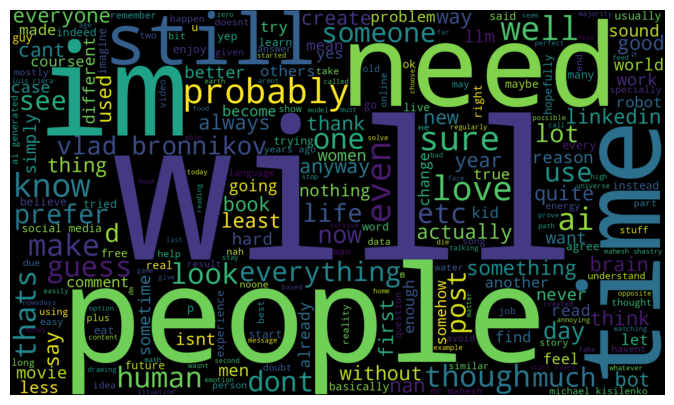

In [ ]:
#create most frequent names cloud

lst=[str(message).split() for message in df.Cleaned_Message]
flat_lst = [item for sublist in lst for item in sublist]

text = " ".join(flat_lst)
print ("There are {} names.".format(len(text.split())))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, width=1700, height=1000, max_words=250, background_color="black").generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
from collections import Counter

word_counts = Counter(flat_lst)

# Get the top 200 most frequent words
top_200_words = word_counts.most_common(50)

# Print the top 200 words and their counts
for word, count in top_200_words:
    print(f"{word}: {count}")


the: 4685
to: 4551
i: 3405
and: 3035
it: 2526
a: 2465
of: 2310
is: 2216
you: 2115
in: 1881
for: 1706
not: 1521
are: 1449
with: 1311
its: 1296
be: 1280
but: 1138
or: 1044
my: 963
so: 957
just: 921
will: 911
like: 884
this: 833
they: 806
can: 782
on: 781
that: 767
as: 749
im: 745
we: 711
was: 707
me: 695
all: 688
if: 669
people: 625
no: 591
too: 578
do: 528
at: 524
your: 523
have: 496
more: 496
ai: 488
an: 485
some: 468
from: 435
what: 426
still: 426
only: 418


## MESSAGE LENGTH ANALYSIS

In [ ]:
# Group by author, sum the 'Length' column, and sort in descending order
author_length_sum = df.groupby('Author')['Length'].sum().sort_values(ascending=False)

author_length_sum

author_length_summary = df.groupby('Author')['Length'].agg(['sum', 'max', 'min', 'mean', 'median', 'count']).sort_values(by='sum', ascending=False)
author_length_summary.head(20)

sum   max  min        mean  median  count
Author                                                                  
Julia G.                    156817  1039    0  116.160741    75.0   1350
Michael Kisilenko            39723   696    6  108.830137    79.0    365
Vlad Bronnikov               39009   574    0   71.707721    51.0    544
Andreas Horn                 34960  1178    4  142.693878    92.0    245
Ralph Aboujaoude Diaz        34850   914    0  102.500000    64.0    340
Marc Duckeck                 26502   538    3  107.295547    78.0    247
Marcus Scholle               26034   649    0   92.647687    66.0    281
Ross Sullivan                19959   353    0   73.109890    60.0    273
Eduardo Ordax                19183  1150    3  116.969512    77.0    164
Stephen Telford              14610  1020    4   98.716216    51.5    148
Ken Cheng                    10863   354    0   82.295455    68.0    132
Stuart Todd                  10731   648    0   88.685950    53.0    121
Max Langley üêê üí© ü§£   10666   813    8  108.836735    63.0     98
Jack Kuveke                   9940   245    0   57.456647    49.0    173
Gabriel Ryan, FRM             8658   297    3   76.619469    62.0    113
Jenna H C.                    8603   625    0  148.327586   118.5     58
Scott Newton                  7059   985   22  207.617647   169.0     34
Kasra Jadid Haghighi          6958   516   10  133.807692    96.5     52
michael j. kainatsky          6544   667   14  159.609756   138.0     41
Stephen Watson                6479   365    0   73.625000    55.5     88

## ANALYSIS BY QUARTERS FOR BOX PLOTS

In [ ]:
# Create quartal labels
df['Quartal'] = pd.PeriodIndex(df['Date'], freq='Q').astype(str)

# Define the quartals you want to split by
quartals = ['2024Q1', '2024Q2', '2024Q3', '2024Q4', '2025Q1', '2025Q2', '2025Q3', '2025Q4']

# Split the DataFrame into a dictionary of DataFrames, one for each quartal
quartal_dfs = {}
for quartal in quartals:
  quartal_dfs[quartal] = df[df['Quartal'] == quartal]




In [ ]:
df

Unnamed: 0.1  Unnamed: 0                Date  \
0                0           0 2025-12-28 20:42:47   
1                1           1 2025-12-28 11:26:01   
2                2           2 2025-12-28 11:11:52   
3                3           3 2025-12-28 09:40:31   
4                4           4 2025-12-26 14:28:11   
...            ...         ...                 ...   
8771          8771        8771 2024-04-05 05:36:50   
8772          8772        8772 2024-04-04 11:50:47   
8773          8773        8773 2024-04-04 11:18:56   
8774          8774        8774 2024-04-03 13:15:02   
8775          8775        8775 2024-04-03 12:30:09   

                                                   Link  \
0     https://www.linkedin.com/feed/update/urn%3Ali%...   
1     https://www.linkedin.com/feed/update/urn%3Ali%...   
2     https://www.linkedin.com/feed/update/urn%3Ali%...   
3     https://www.linkedin.com/feed/update/urn%3Ali%...   
4     https://www.linkedin.com/feed/update/urn%3Ali%...   
...                                                 ...   
8771  https://www.linkedin.com/feed/update/urn%3Ali%...   
8772  https://www.linkedin.com/feed/update/urn%3Ali%...   
8773  https://www.linkedin.com/feed/update/urn%3Ali%...   
8774  https://www.linkedin.com/feed/update/urn%3Ali%...   
8775  https://www.linkedin.com/feed/update/urn%3Ali%...   

                                                Message  \
0     Assuming Finland has 10 is a bold statement, g...   
1     Buying houseplant and investing in wool socks ...   
2     Fake news, Nokia is the same shitty as other b...   
3     Benji F. Well... 20% of Latvians abandoned cou...   
4             Alexandra S. in foreseeable future, sure.   
...                                                 ...   
8771  George, проблема ведь в том, что у психопата, ...   
8772  психопаты - идеальные хищники, использующие ми...   
8773    И обычно чем длиннее список тем меньше зарплата   
8774  Добавлю ещё, что эволюция не поощряет объектив...   
8775  Чтоб оставаться объективным нужно затрачивать ...   

                                        Cleaned_Message  Length  emoji_number  \
0     assuming finland has 10 is a bold statement gi...      92             0   
1     buying houseplant and investing in wool socks ...      67             1   
2     fake news nokia is the same shitty as other br...     116             0   
3     benji f well 20 of latvians abandoned country ...     166             0   
4                alexandra s in foreseeable future sure      38             0   
...                                                 ...     ...           ...   
8771  george проблема ведь в том что у психопата кот...     399             0   
8772  психопаты идеальные хищники использующие мимик...     259             0   
8773    и обычно чем длиннее список тем меньше зарплата      47             0   
8774  добавлю ещё что эволюция не поощряет объективн...     407             0   
8775  чтоб оставаться объективным нужно затрачивать ...     294             0   

                                        Message_no_link  \
0     Assuming Finland has 10 is a bold statement, g...   
1     Buying houseplant and investing in wool socks ...   
2     Fake news, Nokia is the same shitty as other b...   
3     Benji F. Well... 20% of Latvians abandoned cou...   
4             Alexandra S. in foreseeable future, sure.   
...                                                 ...   
8771  George, проблема ведь в том, что у психопата, ...   
8772  психопаты - идеальные хищники, использующие ми...   
8773    И обычно чем длиннее список тем меньше зарплата   
8774  Добавлю ещё, что эволюция не поощряет объектив...   
8775  Чтоб оставаться объективным нужно затрачивать ...   

                             Author  \
0                     The Economist   
1                      Kobi Omenaka   
2                 Michael Kisilenko   
3                  Daniel Berk üêù   
4                          Julia G.   
...                    

## BOX PLOTS OF 15 TOP AUTHORS

In [ ]:
top_20_authors = author_length_sum.head(20)

In [ ]:
top_20_authors

Author
Julia G.                      156817
Michael Kisilenko              39723
Vlad Bronnikov                 39009
Andreas Horn                   34960
Ralph Aboujaoude Diaz          34850
Marc Duckeck                   26502
Marcus Scholle                 26034
Ross Sullivan                  19959
Eduardo Ordax                  19183
Stephen Telford                14610
Ken Cheng                      10863
Stuart Todd                    10731
Max Langley üêê üí© ü§£     10666
Jack Kuveke                     9940
Gabriel Ryan, FRM               8658
Jenna H C.                      8603
Scott Newton                    7059
Kasra Jadid Haghighi            6958
michael j. kainatsky            6544
Stephen Watson                  6479
Name: Length, dtype: int64

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


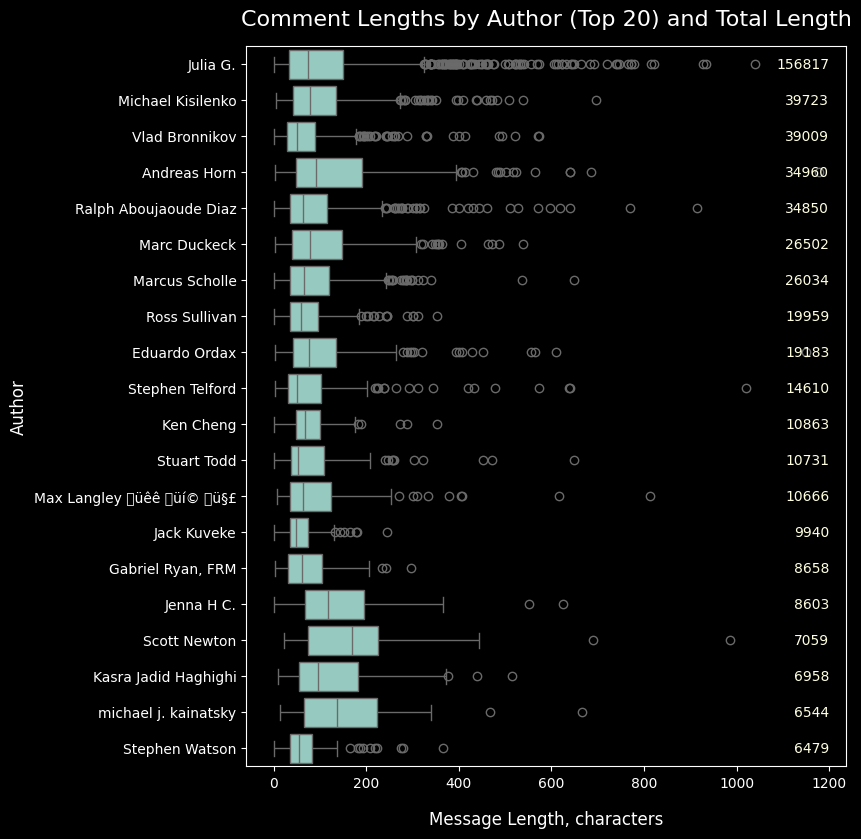

In [ ]:
import matplotlib.pyplot as plt

# Create the boxplot
plt.figure(figsize=(10, 12))  # Adjust figure size as needed
sns.boxplot(x='Length', y='Author', data=df[df['Author'].isin(top_20_authors.index)], order=top_20_authors.index)
plt.xlabel('Message Length, characters', fontsize=12, labelpad=15)
plt.ylabel('Author', fontsize=12)
plt.title(f'Comment Lengths by Author (Top {len(top_20_authors)}) and Total Length', fontsize=16,  pad=15) # pad adds space betwen title and plot

# Add total length annotations to the right of each boxplot
for author in top_20_authors.index:
    total_length = author_length_sum[author]
    plt.text(1200,  # Adjust x-position
             top_20_authors.index.get_loc(author),  # y-position
             f'{total_length:.0f}',
             ha='right',  # Horizontal alignment
             va='center',  # Vertical alignment
             fontsize=10,  # Adjust font size if needed
             color='lightyellow'  # Adjust color if needed
             )

plt.style.use('dark_background')
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # Adjust these values as needed

plt.show()

In [ ]:
top_20_authors.values[-1]

np.int64(6479)

## 6 BOX PLOTS BY QUARTERS

/tmp/ipython-input-2043508857.py:25: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


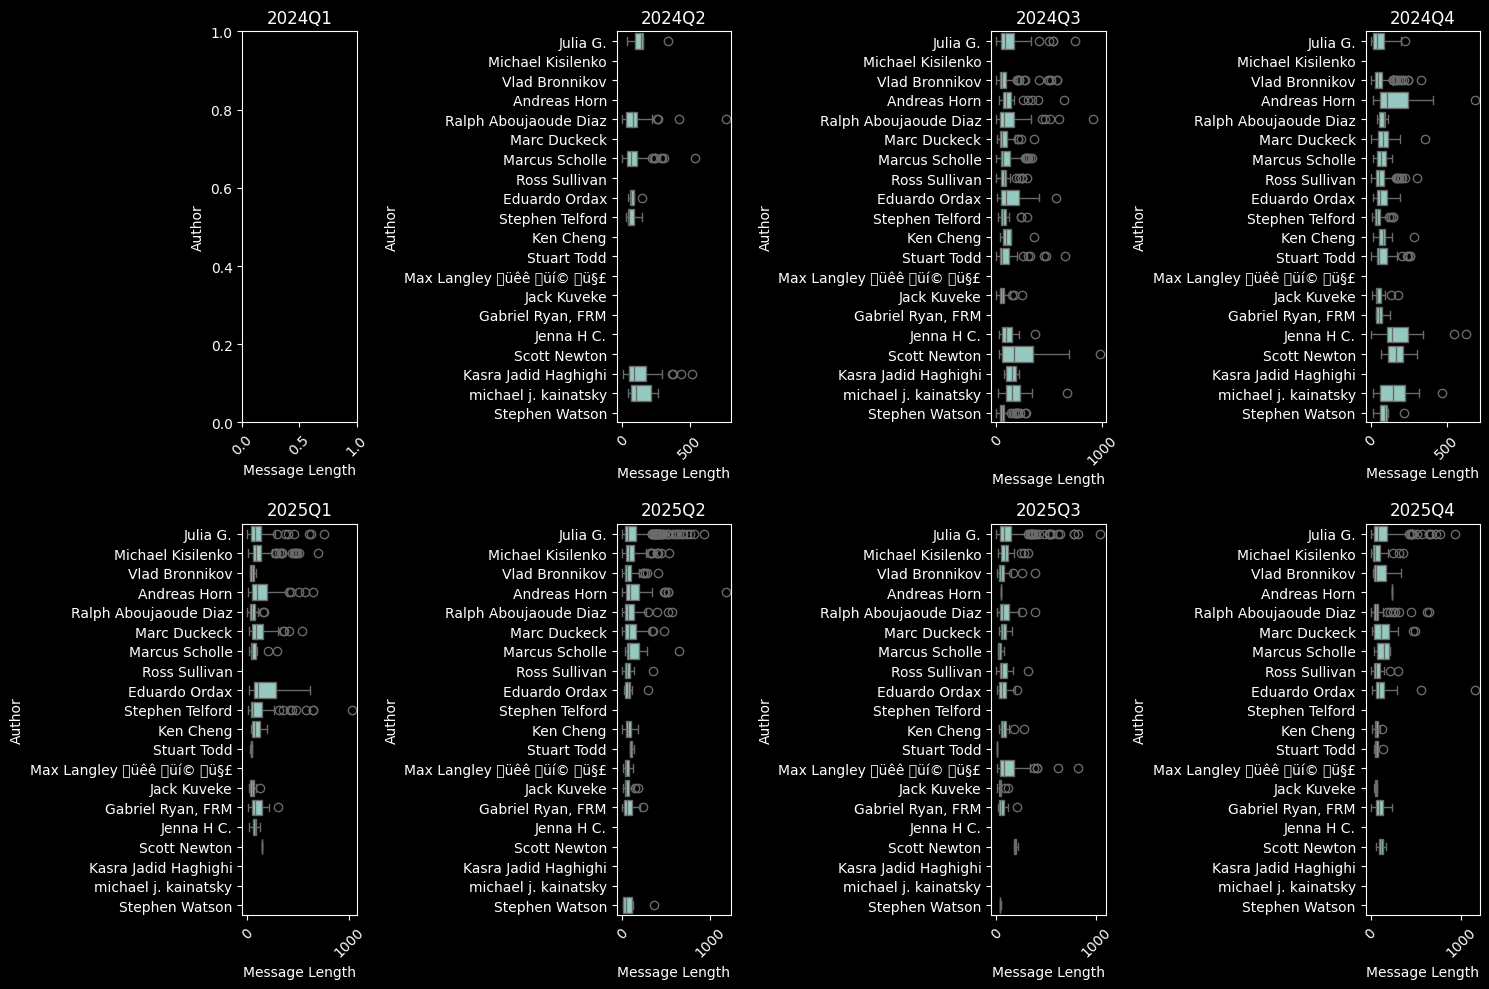

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 215 authors by the sum of their message lengths

# Define the quartals you want to plot
quartals = ['2024Q1', '2024Q2', '2024Q3', '2024Q4', '2025Q1', '2025Q2', '2025Q3', '2025Q4']

# Create subplots
fig, axes = plt.subplots(2,4, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, quartal in enumerate(quartals):
    # Filter data for the current quartal and the top 20 authors
    data_quartal = df[(df['Quartal'] == quartal) & (df['Author'].isin(top_20_authors.index))]

    # Create boxplot on the current subplot
    sns.boxplot(x='Length', y='Author', data=data_quartal, order=top_20_authors.index, ax=axes[i])
    axes[i].set_xlabel('Message Length')
    axes[i].set_ylabel('Author')
    axes[i].set_title(f'{quartal}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


## 2 BOXPLOTS BY YEAR

/tmp/ipython-input-1249602674.py:27: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


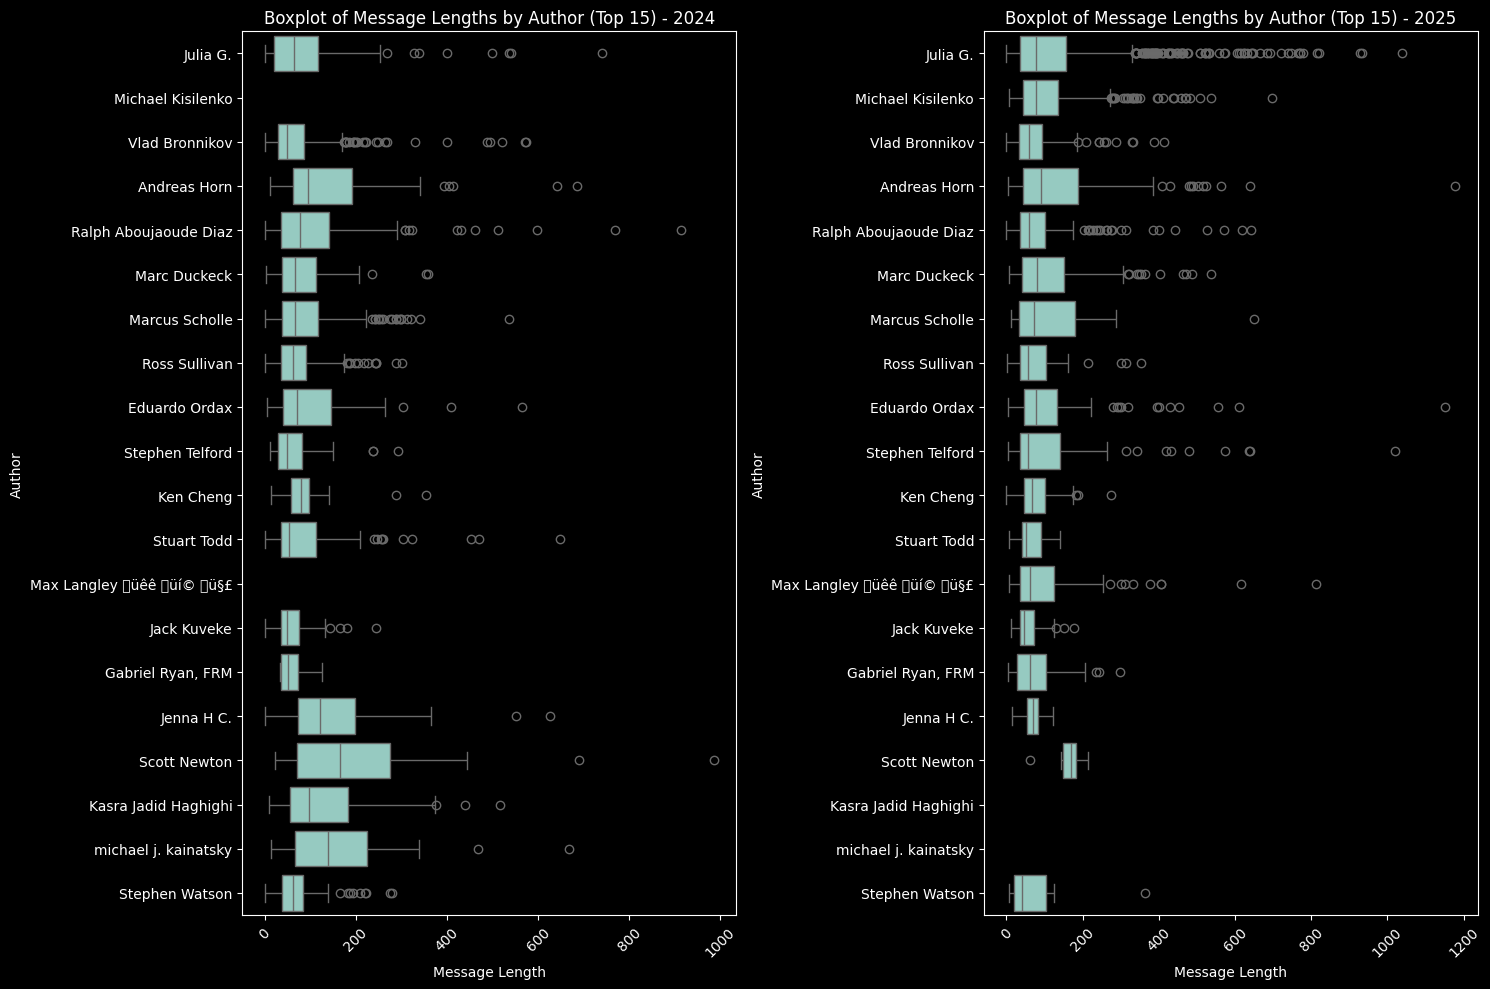

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 15 authors by the sum of their message lengths

# Define the year you want to plot
years = [2024, 2025]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the axes array for easier iteration

for i, year in enumerate(years):
    # Filter data for the current quartal and the top 15 authors
    data_year= df[(df['Date'].dt.year == year) & (df['Author'].isin(top_20_authors.index))]

    # Create boxplot on the current subplot
    sns.boxplot(x='Length', y='Author', data=data_year, order=top_20_authors.index, ax=axes[i])
    axes[i].set_xlabel('Message Length')
    axes[i].set_ylabel('Author')
    axes[i].set_title(f'Boxplot of Message Lengths by Author (Top 15) - {year}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.style.use('dark_background')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

## BOX PLOTS BY AUTHORS

/tmp/ipython-input-2359058686.py:16: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


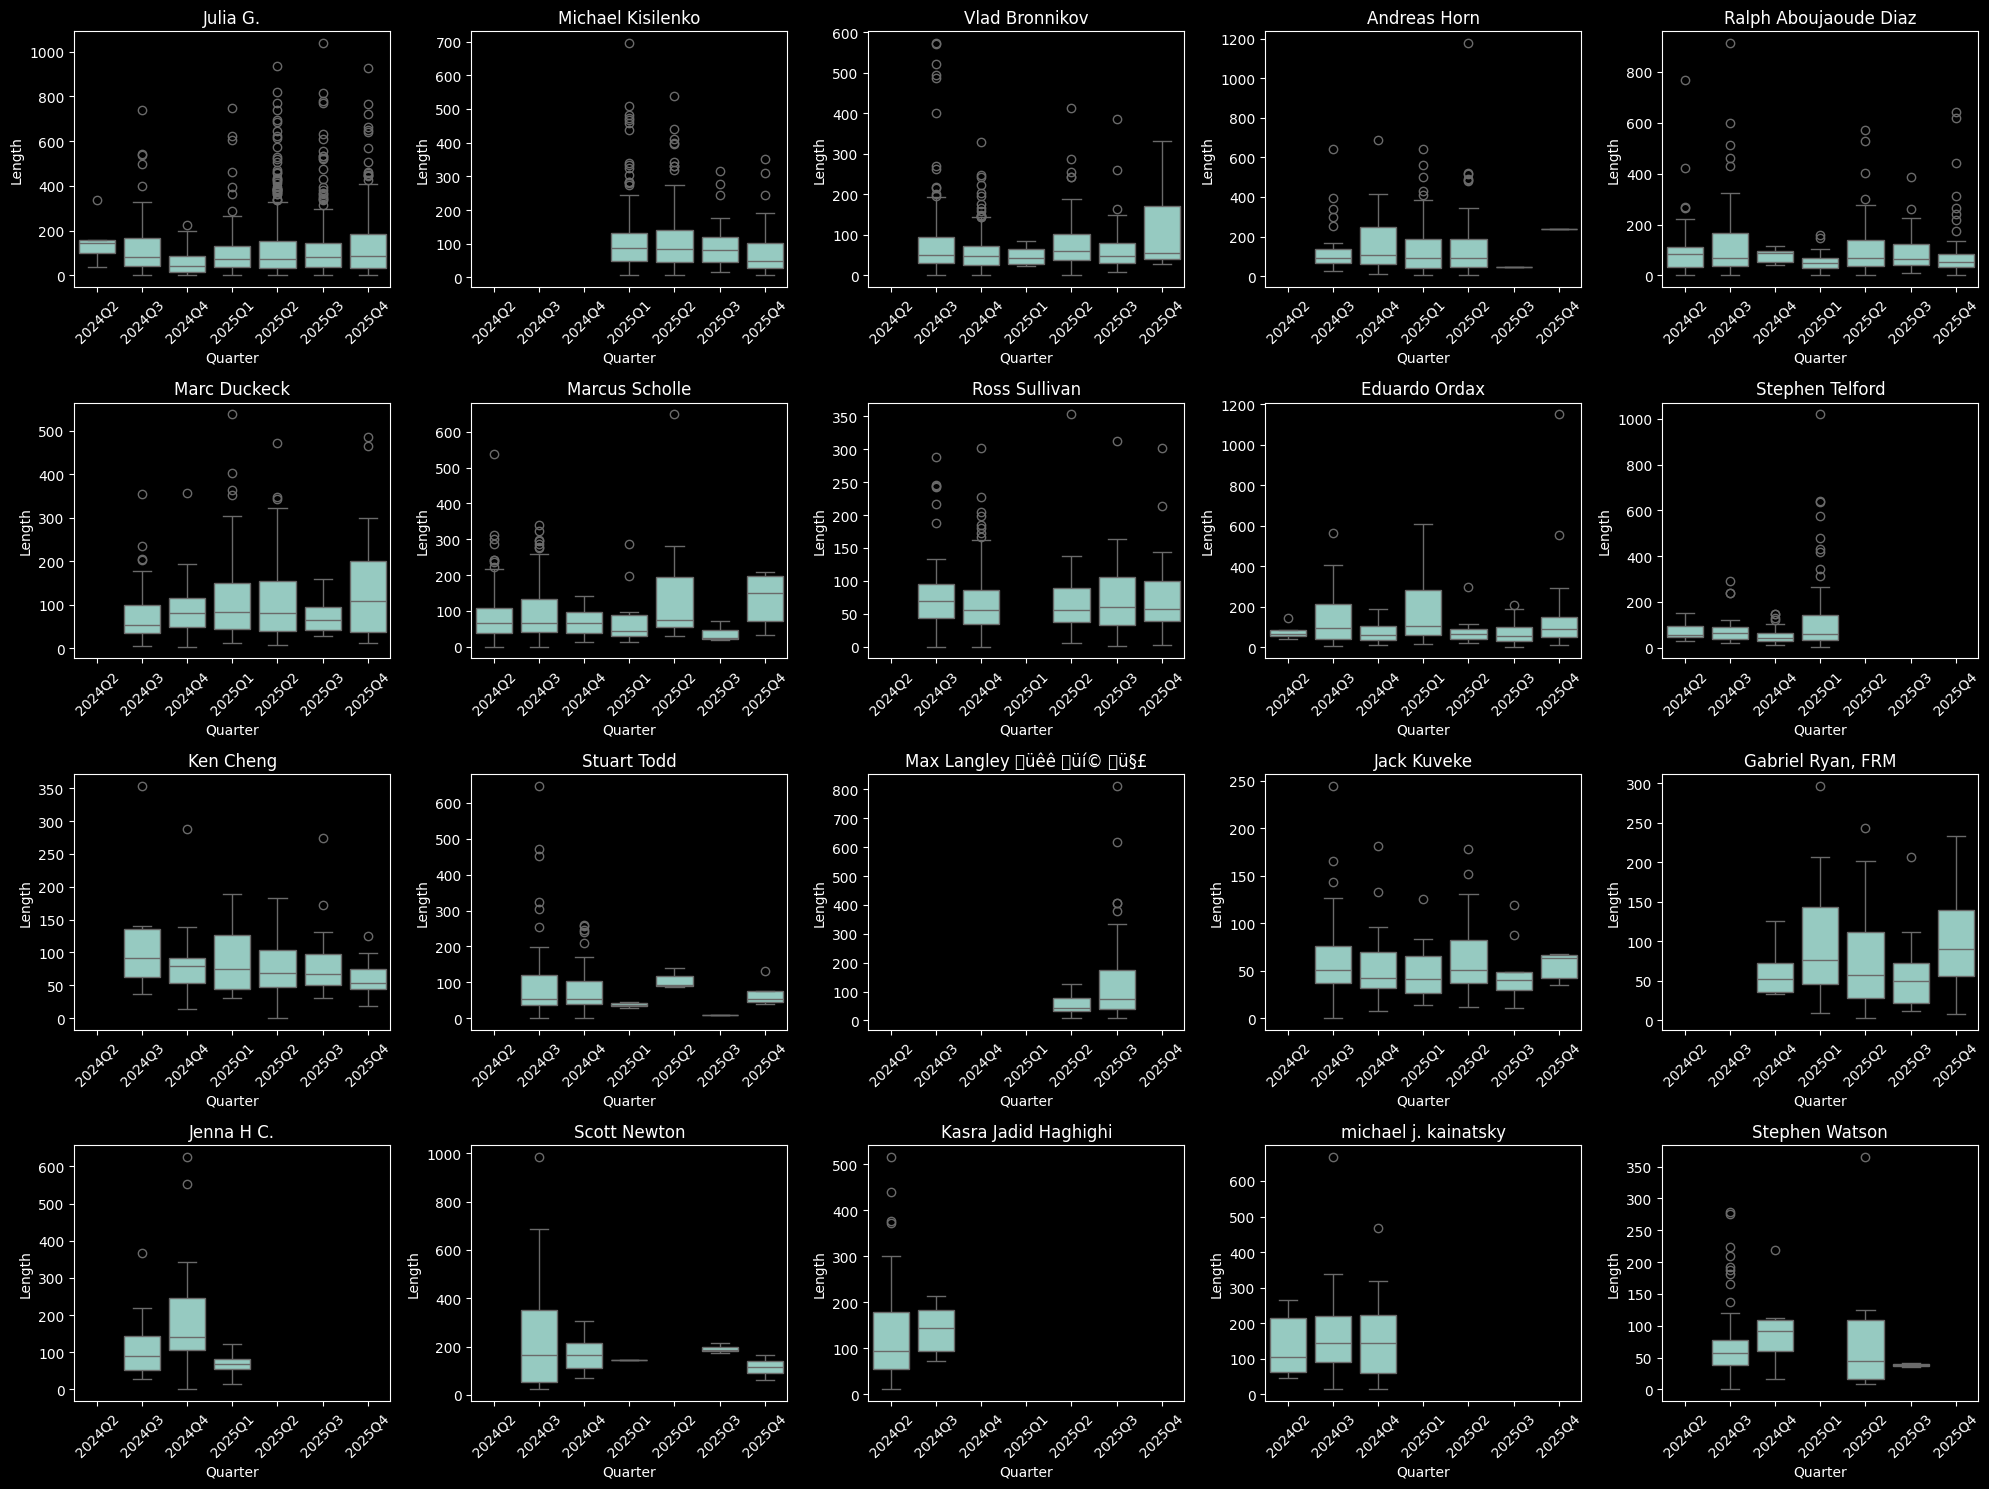

In [ ]:
# Convert 'Date' column to datetime objects if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Create time period categories (e.g., quarters)
df['Quarter'] = df['Date'].dt.to_period('Q')

# Create the box plots
plt.figure(figsize=(20, 15))  # Adjust figure size as needed

for i, author in enumerate(top_20_authors.index):
    plt.subplot(4, 5, i + 1)  # Create subplots in a 4x5 grid
    author_data = df[df['Author'] == author]
    sns.boxplot(x='Quarter', y='Length', data=author_data, order=df['Quarter'][::-1])
    plt.title(author)
    plt.xticks(rotation=45) # Rotate x-axis labels for better readability
    plt.tight_layout()

plt.style.use('dark_background')

plt.show()


## PIVOT TABLE MONTHLY TOTAL MESSAGE LENGTHS BY AUTHORS

In [ ]:

pivot_table = df.pivot_table(index=pd.Grouper(key='Date', freq='ME'),
                                     columns='Author',
                                     values='Length',
                                     aggfunc='sum',
                                     fill_value=0)

pivot_table.index = pd.to_datetime(pivot_table.index, format='%ME-%Y')

pivot_table

Author      .Alex Dunsdon  A-A-Ron McCoy üßôüèª‚ôÇÔ∏è  AI Echo  \
Date                                                               
2024-04-30              0                             0        0   
2024-05-31              0                             0      105   
2024-06-30              0                             0      179   
2024-07-31              0                             0       16   
2024-08-31              0                             0        0   
2024-09-30              0                             0        0   
2024-10-31             65                             0        0   
2024-11-30              0                             0        0   
2024-12-31              0                           254        0   
2025-01-31            105                           503        0   
2025-02-28              0                             0        0   
2025-03-31              0                           328        0   
2025-04-30              0                             0        0   
2025-05-31              0                             0        0   
2025-06-30              0                             0        0   
2025-07-31              0                             0        0   
2025-08-31              0                             0        0   
2025-09-30              0                             0        0   
2025-10-31              0                             0        0   
2025-11-30              0                             0        0   
2025-12-31              0                             0        0   

Author      Aaron Coalson  Aaron Prather  Abderahmane Boucetta, PhD  \
Date                                                                  
2024-04-30              0              0                          0   
2024-05-31              0              0                          0   
2024-06-30              0              0                          0   
2024-07-31              0            114                          0   
2024-08-31              0              0                          0   
2024-09-30              0              0                          0   
2024-10-31              0              0                          0   
2024-11-30              0              0                          0   
2024-12-31              0              0                          0   
2025-01-31              0              0                          0   
2025-02-28              0              0                          0   
2025-03-31              0              0                          0   
2025-04-30              0              0                          0   
2025-05-31              0              0                          0   
2025-06-30              0              0                          0   
2025-07-31              0              0                          0   
2025-08-31              0              0                          0   
2025-09-30              0              0                        145   
2025-10-31              0              0                          0   
2025-11-30             73              0                          0   
2025-12-31              0              0                          0   

Author      Abhishek Agrawal  Abhishek Thakur  \
Date                                            
2024-04-30                 0                0   
2024-05-31                 0               75   
2024-06-30                 0                0   
2024-07-31                 0                0   
2024-08-31                 0                0   
2024-09-30                 0                0   
2024-10-31                 0                0   
2024-11-30                 0                0   
2024-12-31                 0                0   
2025-01-31                 0                0   
2025-02-28                 0                0   
2025-03-31                 0                0   
2025-04-30                 0                0   
2025-05-31                 0                0   
2025-06-30       

In [ ]:
top_20_authors

Author
Julia G.                      156817
Michael Kisilenko              39723
Vlad Bronnikov                 39009
Andreas Horn                   34960
Ralph Aboujaoude Diaz          34850
Marc Duckeck                   26502
Marcus Scholle                 26034
Ross Sullivan                  19959
Eduardo Ordax                  19183
Stephen Telford                14610
Ken Cheng                      10863
Stuart Todd                    10731
Max Langley üêê üí© ü§£     10666
Jack Kuveke                     9940
Gabriel Ryan, FRM               8658
Jenna H C.                      8603
Scott Newton                    7059
Kasra Jadid Haghighi            6958
michael j. kainatsky            6544
Stephen Watson                  6479
Name: Length, dtype: int64

## PIVOT TABLE WITH THE TOP 15 AUTHORS ONLY FOR THE HEATMAP

In [ ]:
pivot_table = df[df['Author'].isin(top_20_authors.index)].pivot_table(index=pd.Grouper(key='Date', freq='ME'),
                                     columns='Author',
                                     values='Length',
                                     aggfunc='sum',
                                     fill_value=0)

pivot_table.index = pd.to_datetime(pivot_table.index, format='%ME-%Y')

pivot_table


Author      Andreas Horn  Eduardo Ordax  Gabriel Ryan, FRM  Jack Kuveke  \
Date                                                                      
2024-04-30             0              0                  0            0   
2024-05-31             0            271                  0            0   
2024-06-30             0            131                  0            0   
2024-07-31           221            454                  0         1325   
2024-08-31          3045            854                  0         2776   
2024-09-30          1287           2046                  0          922   
2024-10-31          2413            510                254          399   
2024-11-30          1704            366                  0          436   
2024-12-31          1167            351                313           80   
2025-01-31          2161           2164                200          328   
2025-02-28          5709              0                712          589   
2025-03-31          6541           2546               2200            0   
2025-04-30          4108           1061                820         1265   
2025-05-31          4849             88               1498          342   
2025-06-30          1474            640                682          695   
2025-07-31             0            866                277          173   
2025-08-31             0            277                449           49   
2025-09-30            45            823                830          228   
2025-10-31           236           3185                  0          135   
2025-11-30             0           2030                  0          198   
2025-12-31             0            520                423            0   

Author      Jenna H C.  Julia G.  Kasra Jadid Haghighi  Ken Cheng  \
Date                                                                
2024-04-30           0         0                   270          0   
2024-05-31           0         0                  5255          0   
2024-06-30           0       912                   584          0   
2024-07-31           0       209                   761          0   
2024-08-31        1934      4554                    88          0   
2024-09-30         121      3995                     0        778   
2024-10-31        6274       566                     0        583   
2024-11-30           0      4104                     0        508   
2024-12-31           0      2148                     0        986   
2025-01-31         274      5508                     0       1230   
2025-02-28           0      1382                     0        404   
2025-03-31           0      4948                     0        140   
2025-04-30           0     21041                     0       1059   
2025-05-31           0     14823                     0        719   
2025-06-30           0     19389                     0       1066   
2025-07-31           0     18917                     0       1578   
2025-08-31           0     12759                     0        458   
2025-09-30           0      8122                     0        682   
2025-10-31           0     16931                     0        631   
2025-11-30           0     12258                     0         41   
2025-12-31           0      4251                     0          0   

Author      Marc Duckeck  Marcus Scholle  Max Langley üêê üí© ü§£  \
Date                                                                   
2024-04-30             0               0                           0   
2024-05-31             0            7646                           0   
2024-06-30             0            3561                           0   
2024-07-31             0            5784                           0   
2024-08-31          2183            2070                           0   
2024-09-30           381            2166                           0   
2024-10-31           665              61                           0   
2024-11-30           121             5

## HEATMAP WITH THE TOP 15 AUTHORS MONTHLY MESSAGE LENGTH

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


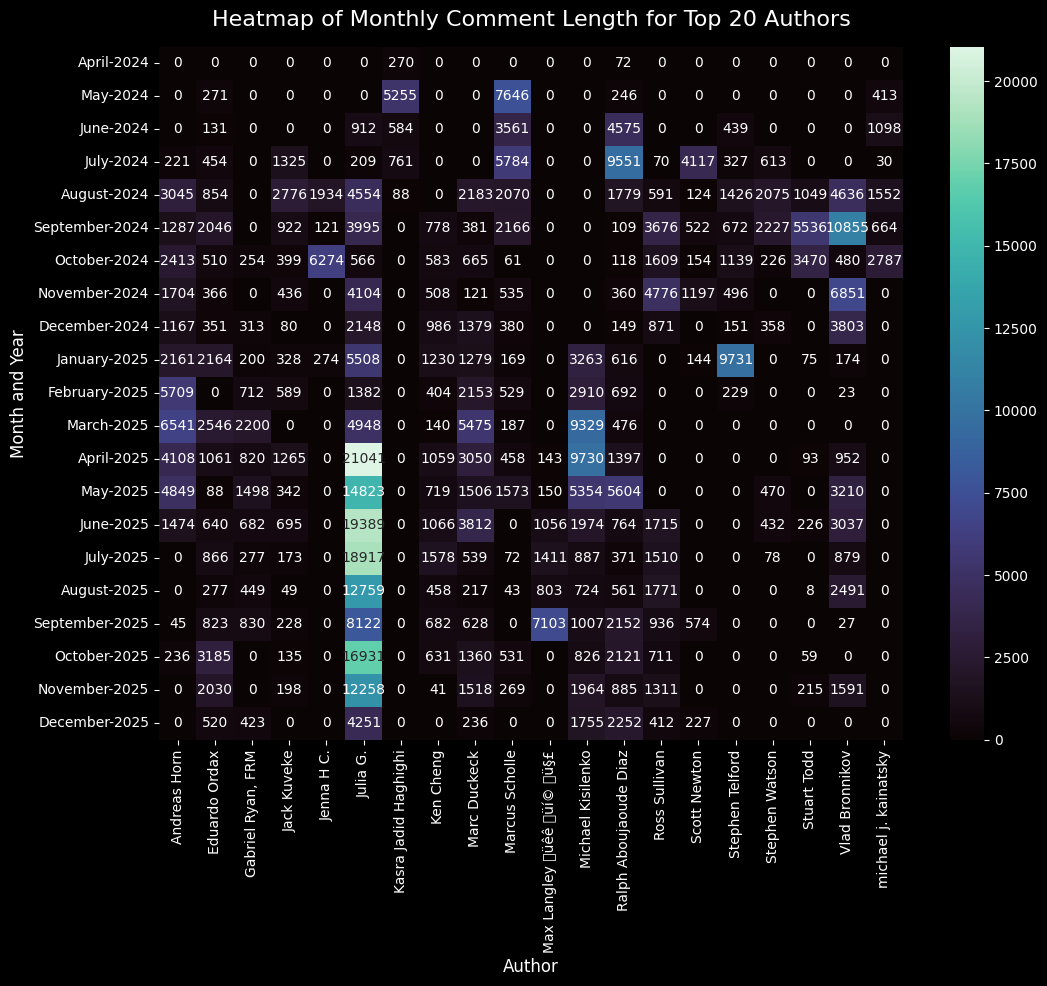

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

if not isinstance(pivot_table.index, pd.Index):
    pivot_table.index = pd.Index(pivot_table.index)

plt.figure(figsize=(12, 9))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="mako", yticklabels=pivot_table.index.strftime('%B-%Y'))
plt.title(f'Heatmap of Monthly Comment Length for Top {pivot_table.shape[1]} Authors', fontsize=16, pad=15)  # Threshold: comments > {top_15_authors.values[-1]-1}', fontsize=16,  pad=15)
plt.xlabel('Author', fontsize=12)
plt.ylabel('Month and Year', fontsize=12) # Changed the label

plt.style.use('dark_background')

plt.xticks(rotation=90)#, ha='right') # Rotated x-axis labels for better readability

#plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1) # Adjust these values as needed

#plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 63743 (\uf8ff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


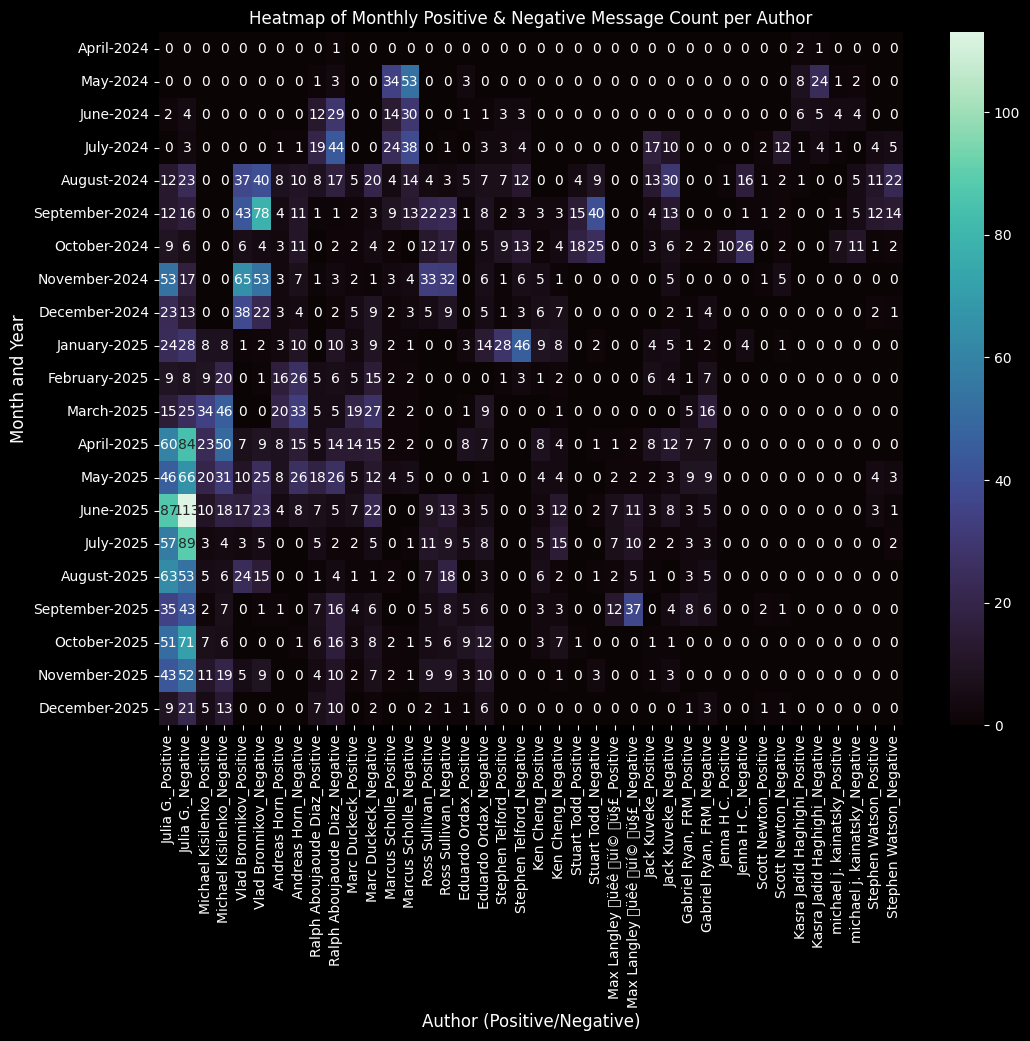

In [ ]:
# Create a new pivot table for positive and negative messages
positive_pivot = df[
    (df["Author"].isin(top_20_authors.index)) & (df["Sentiment_Label_message"] == "POSITIVE")
].pivot_table(
    index=pd.Grouper(key="Date", freq="ME"),
    columns="Author",
    values="Message",
    aggfunc="count",
    fill_value=0,
)

negative_pivot = df[
    (df["Author"].isin(top_20_authors.index)) & (df["Sentiment_Label_message"] == "NEGATIVE")
].pivot_table(
    index=pd.Grouper(key="Date", freq="ME"),
    columns="Author",
    values="Message",
    aggfunc="count",
    fill_value=0,
)


# Combine positive and negative counts into a single DataFrame
sentiment_pivot = pd.DataFrame(index=positive_pivot.index)

for author in top_20_authors.index:
    if author in positive_pivot.columns:
        sentiment_pivot[author + "_Positive"] = positive_pivot[author]
    else:
        sentiment_pivot[author + "_Positive"] = 0

    if author in negative_pivot.columns:
        sentiment_pivot[author + "_Negative"] = negative_pivot[author]
    else:
        sentiment_pivot[author + "_Negative"] = 0

#Convert index to DateTimeIndex
sentiment_pivot.index = pd.to_datetime(sentiment_pivot.index)

#Plot the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(sentiment_pivot, annot=True, fmt="d", cmap="mako", yticklabels=sentiment_pivot.index.strftime('%B-%Y'))
plt.title(f"Heatmap of Monthly Positive & Negative Message Count per Author")
plt.xlabel("Author (Positive/Negative)", fontsize=12)
plt.ylabel("Month and Year", fontsize=12)
plt.xticks(rotation=90)
plt.show()


## COMMENTS AND POSTS SENTIMENT TABLE

In [ ]:
df_unique_links = df.drop_duplicates(subset='Link', keep='first') #only to show unique posts to calculate their negativity percentage

sentiment_counts = df.groupby(['Author']).agg({'Sentiment_Label_message': lambda x: x.value_counts().to_dict()})

# Sort by total sentiment counts in descending order
sentiment_counts['Number_of_Comments'] = sentiment_counts['Sentiment_Label_message'].apply(lambda x: sum(x.values()))
sentiment_counts['Total_Length'] = df.groupby('Author')['Length'].sum()
sentiment_counts['Average_Length'] = round(sentiment_counts['Total_Length']/sentiment_counts['Number_of_Comments'],1)

sentiment_counts['Negative_Posts'] = df_unique_links[df_unique_links['Sentiment_Label_post']=='NEGATIVE'].groupby('Author')['Sentiment_Label_post'].count()
sentiment_counts['Negative_Posts'] = pd.to_numeric(sentiment_counts['Negative_Posts'], errors='coerce').fillna(0).astype(int)

sentiment_counts['Positive_Posts'] = df_unique_links[df_unique_links['Sentiment_Label_post']=='POSITIVE'].groupby('Author')['Sentiment_Label_post'].count()
sentiment_counts['Positive_Posts'] = pd.to_numeric(sentiment_counts['Positive_Posts'], errors='coerce').fillna(0).astype(int)

def calculate_negative_ratio(sentiment_dict):
    return round(sentiment_dict.get('NEGATIVE', 0) / sum(sentiment_dict.values()) if sum(sentiment_dict.values()) > 0 else 0, 2)

sentiment_counts['Negative_Ratio_Comment'] = sentiment_counts['Sentiment_Label_message'].apply(calculate_negative_ratio)
sentiment_counts['Negative_Ratio_Post'] = round(sentiment_counts['Negative_Posts']/(sentiment_counts['Negative_Posts']+sentiment_counts['Positive_Posts']),2)

sentiment_counts = sentiment_counts.sort_values('Number_of_Comments', ascending=False)
# Display the result

sentiment_counts.head(20)


Sentiment_Label_message  \
Author                                                           
Julia G.                    {'NEGATIVE': 735, 'POSITIVE': 615}   
Vlad Bronnikov              {'NEGATIVE': 287, 'POSITIVE': 257}   
Michael Kisilenko           {'NEGATIVE': 228, 'POSITIVE': 137}   
Ralph Aboujaoude Diaz       {'NEGATIVE': 226, 'POSITIVE': 114}   
Marcus Scholle              {'NEGATIVE': 170, 'POSITIVE': 111}   
Ross Sullivan               {'NEGATIVE': 149, 'POSITIVE': 124}   
Marc Duckeck                 {'NEGATIVE': 166, 'POSITIVE': 81}   
Andreas Horn                 {'NEGATIVE': 163, 'POSITIVE': 82}   
Jack Kuveke                  {'NEGATIVE': 108, 'POSITIVE': 65}   
Eduardo Ordax                {'NEGATIVE': 116, 'POSITIVE': 48}   
Stephen Telford               {'NEGATIVE': 93, 'POSITIVE': 55}   
Ken Cheng                     {'NEGATIVE': 74, 'POSITIVE': 58}   
Stuart Todd                   {'NEGATIVE': 83, 'POSITIVE': 38}   
Gabriel Ryan, FRM             {'NEGATIVE': 69, 'POSITIVE': 44}   
Max Langley üêê üí© ü§£    {'NEGATIVE': 67, 'POSITIVE': 31}   
Stephen Watson                {'NEGATIVE': 50, 'POSITIVE': 38}   
DAVID HALLANGEN üé®          {'NEGATIVE': 44, 'POSITIVE': 34}   
Mahmoud Owies                 {'NEGATIVE': 44, 'POSITIVE': 15}   
Jenna H C.                    {'NEGATIVE': 47, 'POSITIVE': 11}   
Alvin Foo                     {'NEGATIVE': 38, 'POSITIVE': 17}   

                            Number_of_Comments  Total_Length  Average_Length  \
Author                                                                         
Julia G.                                  1350        156817           116.2   
Vlad Bronnikov                             544         39009            71.7   
Michael Kisilenko                          365         39723           108.8   
Ralph Aboujaoude Diaz                      340         34850           102.5   
Marcus Scholle                             281         26034            92.6   
Ross Sullivan                              273         19959            73.1   
Marc Duckeck                               247         26502           107.3   
Andreas Horn                               245         34960           142.7   
Jack Kuveke                                173          9940            57.5   
Eduardo Ordax                              164         19183           117.0   
Stephen Telford                            148         14610            98.7   
Ken Cheng                                  132         10863            82.3   
Stuart Todd                                121         10731            88.7   
Gabriel Ryan, FRM                          113          8658            76.6   
Max Langley üêê üí© ü§£                  98         10666           108.8   
Stephen Watson                              88          6479            73.6   
DAVID HALLANGEN üé®                        78          5579            71.5   
Mahmoud Owies                               59          5841            99.0   
Jenna H C.                                  58          8603           148.3   
Alvin Foo                                   55          6439           117.1   

                            Negative_Posts  Positive_Posts  \
Author                                                       
Julia G.                               175              66   
Vlad Bronnikov                          96              42   
Michael Kisilenko                      147              34   
Ralph Aboujaoude Diaz                  155              40   
Marcus Scholle                         136              14   
Ross Sullivan                           96              57   
Marc Duckeck                            52              52   
Andreas Horn                            75              45   
Jack Kuveke                             77              13   
Eduardo Ordax                           69              29   
Stephen Telford                         64              31   
Ken Cheng          

## DAILY POSITIVE/NEGATIVE COMMENTS COUNT

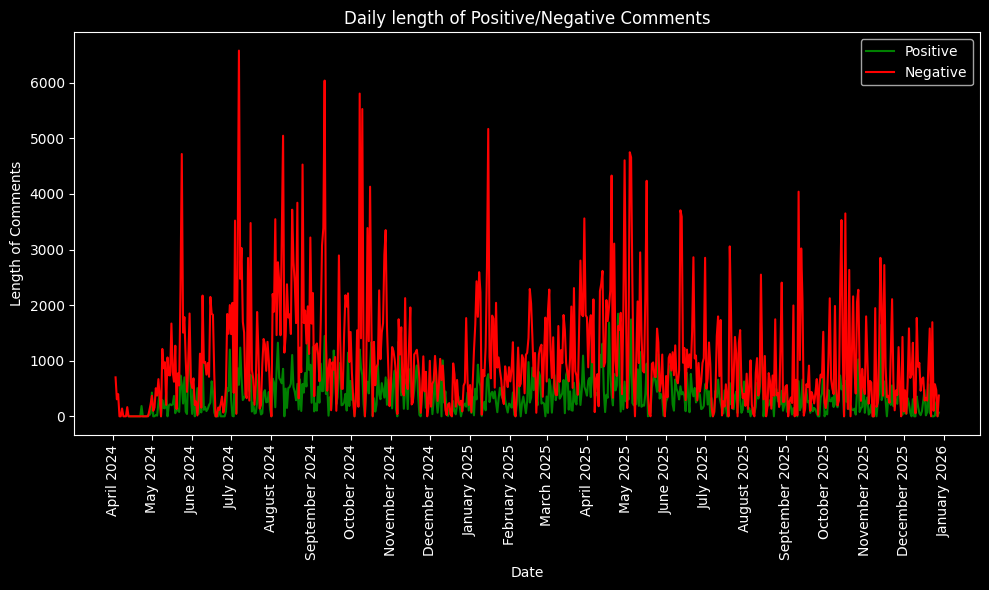

In [ ]:
daily_positive_message_count = df[df['Sentiment_Label_message']=='POSITIVE'].groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()
daily_negative_message_count = df[df['Sentiment_Label_message']=='NEGATIVE'].groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(daily_positive_message_count.index, daily_positive_message_count.values, label='Positive', color='green')  # Negate the y-values
plt.plot(daily_negative_message_count.index, daily_negative_message_count.values, label='Negative', color='red')  # Negate the y-values
#plt.plot(daily_message_count.index, daily_message_count.values, color='blue')


plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.style.use('dark_background')

plt.xticks(rotation=90)

plt.xlabel('Date')
plt.ylabel('Length of Comments') # Change y-axis label
plt.title('Daily length of Positive/Negative Comments') # Change title
plt.legend()
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


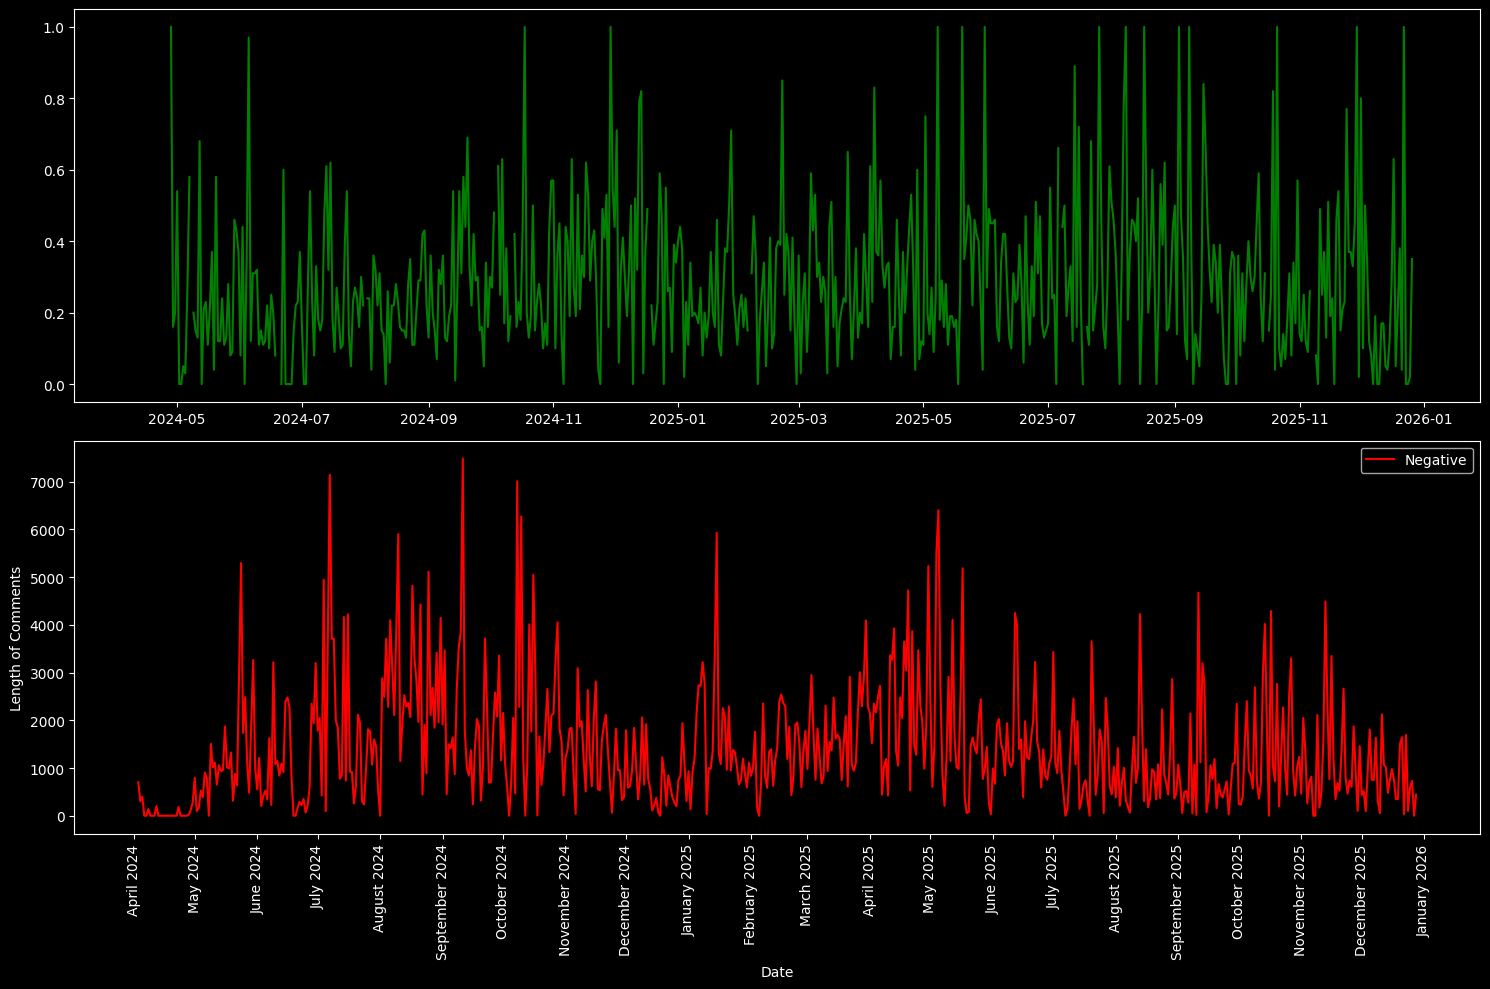

In [ ]:
daily_positive_message_length = df[df['Sentiment_Label_message']=='POSITIVE'].groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()
daily_negative_message_length = df[df['Sentiment_Label_message']=='NEGATIVE'].groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()

daily_positivity=daily_positive_message_length.div(daily_positive_message_length + daily_negative_message_length, fill_value=0).round(2)

daily_length=df.groupby(pd.Grouper(key='Date', freq='d'))['Length'].sum()

import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(15, 10)) # 2 rows one column

axes[0].plot(daily_positivity.index, daily_positivity.values, label='Positive', color='green')
axes[1].plot(daily_length.index, daily_length.values, label='Negative', color='red')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %Y'))
plt.style.use('dark_background')

plt.xticks(rotation=90)

plt.xlabel('Date')
plt.ylabel('Length of Comments') # Change y-axis label
#plt.title('Daily length of Positive/Negative Comments') # Change title
plt.legend()
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sentiment scores grouped

In [ ]:
# Create bins for Sentiment_Score_message
bins = [0, 0.6, 0.8, 1.0]
labels_neg = ['Weak sentiment', 'Moderate sentiment', 'Strong sentiment']
labels_pos = ['Weak sentiment', 'Moderate sentiment', 'Strong sentiment']
df['Sentiment_Score_Interval'] = pd.cut(df['Sentiment_Score_message'], bins=bins, labels=labels_neg, right=False)

# Calculate sum of 'Length' for negative sentiment and different score intervals
result_neg = df[df['Sentiment_Label_message'] == 'NEGATIVE'].groupby('Sentiment_Score_Interval').agg({'Length': 'sum', 'Message': 'count'}

                                                                                                     ).rename(columns={'Length': 'Total_Length', 'Message': 'Message_Count'})
result_pos = df[df['Sentiment_Label_message'] == 'POSITIVE'].groupby('Sentiment_Score_Interval').agg({'Length': 'sum', 'Message': 'count'}
                                                                                                 ).rename(columns={'Length': 'Total_Length', 'Message': 'Message_Count'})


merged_sentiment = pd.merge(result_neg, result_pos, on='Sentiment_Score_Interval', suffixes=('_negative', '_positive'))
merged_sentiment


/tmp/ipython-input-1386506833.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_neg = df[df['Sentiment_Label_message'] == 'NEGATIVE'].groupby('Sentiment_Score_Interval').agg({'Length': 'sum', 'Message': 'count'}
/tmp/ipython-input-1386506833.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_pos = df[df['Sentiment_Label_message'] == 'POSITIVE'].groupby('Sentiment_Score_Interval').agg({'Length': 'sum', 'Message': 'count'}


Total_Length_negative  Message_Count_negative  \
Sentiment_Score_Interval                                                  
Weak sentiment                            13899                     119   
Moderate sentiment                        33434                     299   
Strong sentiment                         632621                    5080   

                          Total_Length_positive  Message_Count_positive  
Sentiment_Score_Interval                                                 
Weak sentiment                             8097                     106  
Moderate sentiment                        19693                     427  
Strong sentiment                         199092                    2730

## Sentiment heatmaps

In [ ]:
# problem with the first week that should be 52th actually
pivot_table_neg = df[
    (df["Author"].isin(top_20_authors.index)) & (df["Sentiment_Label_message"] == "NEGATIVE") & (df['Date'].dt.year==2024)
].pivot_table(index=df['Date'].dt.weekday,
                                     columns=df['Date'].dt.isocalendar().week,
                                     values='Message',
                                     aggfunc='count',
                                     fill_value=0)
pivot_table_neg


week  1   18  19  20  21  22  23  24  25  26  ...  43  44  45  46  47  48  49  \
Date                                          ...                               
0      6   2   4   1   2   4   2   4   4   3  ...   1   4   3   5   2   4   3   
1      2   0   2   2   5   1   3   2   1   2  ...   6   8   2  10   5   6   4   
2      0   2   0   1   3   0   1   2   0   2  ...   6   4   1   2   8   6   5   
3      0   0   2   2   2   2   2   3   0   1  ...   3   1   6   5   3   6   6   
4      0   0   4   1  18   1   0   3   1   4  ...   7   2  12   9   6   0   3   
5      0   1   0   6   3   1   2   5   0   4  ...   7   1   9   9   6   0   2   
6      0   3   1   3   6   0  13   6   1   4  ...   4   6   5   1   0  10   4   

week  50  51  52  
Date              
0      3   1   1  
1      0   0   0  
2      5   0   3  
3      1   3   0  
4      2   4   1  
5      1   4   2  
6      1   0   7  

[7 rows x 36 columns]

In [ ]:
pivot_table_pos = df[
    (df["Author"].isin(top_20_authors.index)) & (df["Sentiment_Label_message"] == "POSITIVE") & (df['Date'].dt.year==2024)
].pivot_table(index=df['Date'].dt.weekday,
                                     columns=df['Date'].dt.isocalendar().week,
                                     values='Message',
                                     aggfunc='count',
                                     fill_value=0)

In [ ]:
pivot_table_positivity = pivot_table_pos / (pivot_table_pos + pivot_table_neg)

pivot_table_positivity = pivot_table_positivity.fillna(0)

pivot_table_positivity

week        1    17        18        19        20        21    22        23  \
Date                                                                          
0     0.333333  0.0  0.000000  0.428571  0.000000  0.333333  0.00  0.000000   
1     0.500000  0.0  1.000000  0.666667  0.333333  0.166667  0.00  0.250000   
2     0.000000  0.0  0.666667  0.000000  0.750000  0.250000  0.00  0.750000   
3     0.000000  0.0  0.000000  0.600000  0.500000  0.333333  0.60  0.000000   
4     0.000000  0.0  0.000000  0.200000  0.666667  0.052632  0.75  0.000000   
5     0.000000  0.0  0.000000  0.000000  0.454545  0.400000  0.00  0.333333   
6     0.000000  0.0  0.000000  0.800000  0.000000  0.250000  1.00  0.315789   

week        24        25  ...        43        44        45        46  \
Date                      ...                                           
0     0.200000  0.555556  ...  0.000000  0.333333  0.500000  0.444444   
1     0.333333  0.500000  ...  0.333333  0.272727  0.000000  0.375000   
2     0.000000  0.000000  ...  0.250000  0.200000  0.000000  0.800000   
3     0.250000  0.000000  ...  0.400000  0.500000  0.684211  0.500000   
4     0.250000  0.000000  ...  0.416667  0.000000  0.368421  0.357143   
5     0.375000  1.000000  ...  0.125000  0.000000  0.437500  0.437500   
6     0.142857  0.000000  ...  0.500000  0.500000  0.687500  0.888889   

week        47        48        49        50        51        52  
Date                                                              
0     0.666667  0.733333  0.571429  0.625000  0.666667  0.666667  
1     0.545455  0.666667  0.333333  0.000000  0.000000  0.000000  
2     0.600000  0.333333  0.583333  0.375000  0.000000  0.000000  
3     0.700000  0.333333  0.333333  0.500000  0.571429  1.000000  
4     0.600000  1.000000  0.750000  0.500000  0.333333  0.750000  
5     0.250000  0.000000  0.500000  0.000000  0.200000  0.000000  
6     1.000000  0.677419  0.333333  0.666667  1.000000  0.000000  

[7 rows x 37 columns]

<Axes: xlabel='week', ylabel='Date'>

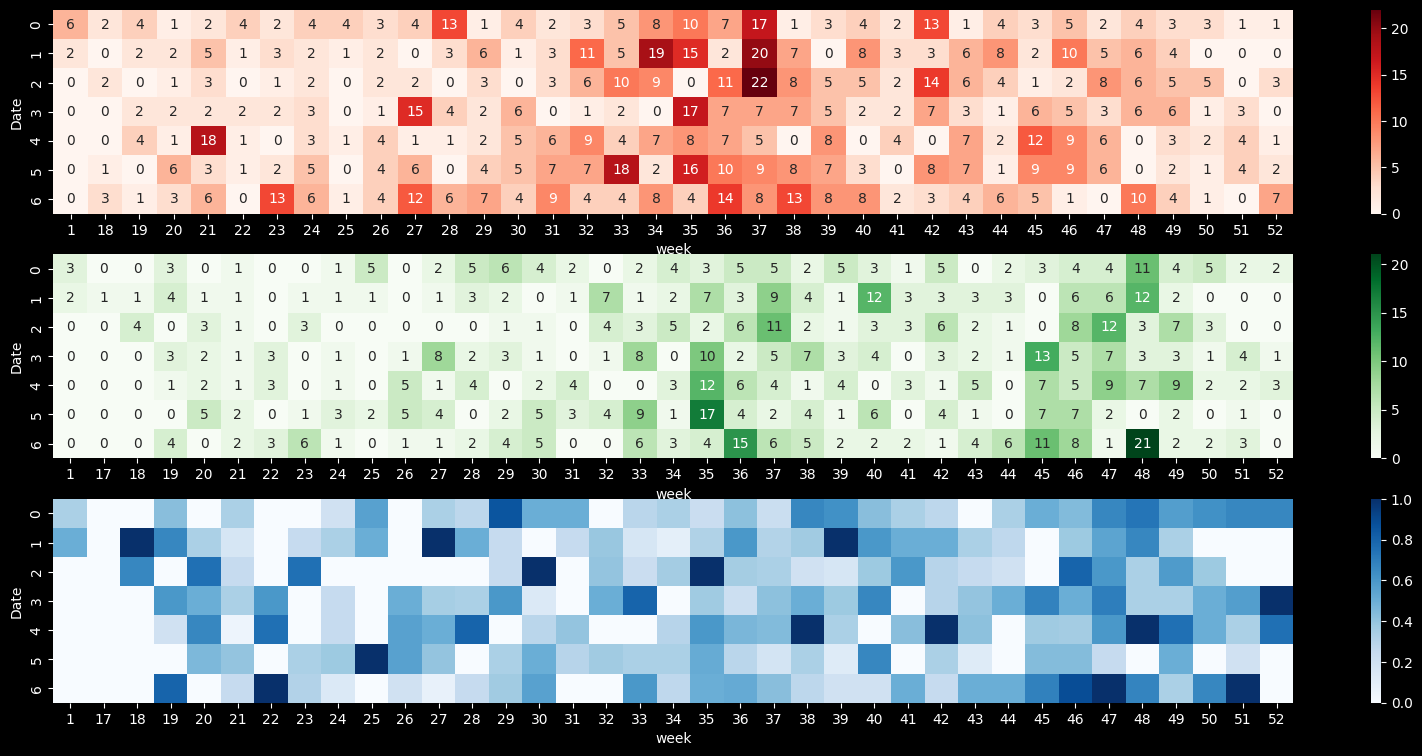

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pivot_table' is your DataFrame with dayofweek as index and month names as columns.
fig, axes = plt.subplots(3, 1, figsize=(20, 9))  # 2 rows, 3 columns
#axes = axes.flatten()

#plt.figure(figsize=(20, 2))

sns.heatmap(pivot_table_neg, annot=True, fmt="d", cmap="Reds", ax=axes[0])
sns.heatmap(pivot_table_pos, annot=True, fmt="d", cmap='Greens', ax=axes[1])
sns.heatmap(pivot_table_positivity,  cmap="Blues", ax=axes[2])

#plt.title('Heatmap of Negative Comments in 2024')
#plt.xlabel('Weeks')
#plt.ylabel('Day of Week')
#plt.xticks(rotation=45)
#plt.show()


In [ ]:
df_top_15=df[df['Author'].isin(top_20_authors.index)]

In [ ]:
# Example of some short ironic/sarcastic comments that were interpreted as positive by sentiment analysis. Context matters.

df_top_15[(df_top_15['Sentiment_Label_message']=='POSITIVE')&
          (df_top_15['Sentiment_Label_post']=='NEGATIVE')&
          (df_top_15['Sentiment_Score_message']>=0.999)&
          (df_top_15['Sentiment_Score_post']>=0.999)&
          (df_top_15['Length']<=50)].sort_values(by='Sentiment_Score_message', ascending=False)

Unnamed: 0.1  Unnamed: 0                Date  \
2183          2183        2183 2025-06-07 04:54:12   
2239          2239        2239 2025-06-04 12:33:55   
229            229         229 2025-11-24 07:50:09   
1319          1319        1319 2025-08-12 12:50:11   
807            807         807 2025-10-04 06:53:40   
6175          6175        6175 2024-09-26 06:09:10   
5741          5741        5741 2024-10-19 09:51:29   
3046          3046        3046 2025-04-18 13:00:56   
6020          6020        6020 2024-10-05 16:22:51   
3721          3721        3721 2025-03-10 21:02:50   
4385          4385        4385 2025-01-21 15:32:41   
2273          2273        2273 2025-06-01 18:39:55   
2349          2349        2349 2025-05-26 05:39:00   
2639          2639        2639 2025-05-07 16:43:19   
875            875         875 2025-09-25 10:39:21   
2861          2861        2861 2025-04-26 19:14:36   
7439          7439        7439 2024-08-06 19:41:28   
1931          1931        1931 2025-06-21 07:01:40   
3630          3630        3630 2025-03-17 07:19:59   

                                                   Link  \
2183  https://www.linkedin.com/feed/update/urn%3Ali%...   
2239  https://www.linkedin.com/feed/update/urn%3Ali%...   
229   https://www.linkedin.com/feed/update/urn%3Ali%...   
1319  https://www.linkedin.com/feed/update/urn%3Ali%...   
807   https://www.linkedin.com/feed/update/urn%3Ali%...   
6175  https://www.linkedin.com/feed/update/urn%3Ali%...   
5741  https://www.linkedin.com/feed/update/urn%3Ali%...   
3046  https://www.linkedin.com/feed/update/urn%3Ali%...   
6020  https://www.linkedin.com/feed/update/urn%3Ali%...   
3721  https://www.linkedin.com/feed/update/urn%3Ali%...   
4385  https://www.linkedin.com/feed/update/urn%3Ali%...   
2273  https://www.linkedin.com/feed/update/urn%3Ali%...   
2349  https://www.linkedin.com/feed/update/urn%3Ali%...   
2639  https://www.linkedin.com/feed/update/urn%3Ali%...   
875   https://www.linkedin.com/feed/update/urn%3Ali%...   
2861  https://www.linkedin.com/feed/update/urn%3Ali%...   
7439  https://www.linkedin.com/feed/update/urn%3Ali%...   
1931  https://www.linkedin.com/feed/update/urn%3Ali%...   
3630  https://www.linkedin.com/feed/update/urn%3Ali%...   

                                                Message  \
2183                 Indeed, greatness is all we need.    
2239                                I love you love it.   
229                      Well, he is still attractive.    
1319               Agree, she is the best of the best.    
807                     Exactly. The logic is flawless.   
6175     'Good vibe' for the rest of the day. Thanks. 😂   
5741                    Proud to be half Lithuanian. :D   
3046                                       Good robot!    
6020                                       Well done. 👍   
3721                Let's just agree, it's all magic. ✨   
4385                           Just a regular nice guy.   
2273  Charly K. take them by surprise like a face hu...   
2349             Finally, everything now makes sense. 🖖   
2639            It's an expert in gaslighting for sure.   
875                  bibidi babidi boo, wow so so true!   
2861               Michael Kisilenko love for benedict.   
7439      Wes Lorenzini words of a wise person, indeed.   
1931                        Yes, exactly my experience.   
3630                                  Marc Duckeck sure   

                                        Cleaned_Message  Length  emoji_number  \
2183                    indeed greatness is all we need      31             0   
2239                                 i love you love it      18             0   
229                         well he is still attractive      27             0   
1319                  agree she is the best of the best      33             0   
807                       exactly the logic is flawless      29             0   
6175           good vibe for the rest of the day thanks      40             1

## FIRST&LAST MESSAGES TO TOP 15 AUTHORS

In [ ]:
import pandas as pd

# Create an empty list to store the data for the table
table_data = []
table_data1= []

# Iterate through the top 15 authors
for author in top_20_authors.index:
    try:
        # Get the first and last messages and dates for the current author
        first_message = df[df['Author'] == author]['Message_no_link'].iloc[-1]
        last_message = df[df['Author'] == author]['Message_no_link'].iloc[0]
        first_date = df[df['Author'] == author]['Date'].iloc[-1]
        last_date = df[df['Author'] == author]['Date'].iloc[0]
        first_sentiment = df[df['Author'] == author]['Sentiment_Label_message'].iloc[-1]
        last_sentiment = df[df['Author'] == author]['Sentiment_Label_message'].iloc[0]

        # Append the data to the list
        table_data.append({'Author': author, 'First_comment': first_message, 'Date': first_date, 'Sentiment': first_sentiment})
        table_data1.append({'Author': author, 'Last_comment': last_message, 'Date': last_date, 'Sentiment': last_sentiment})
    except IndexError:
        print(f"No messages found for author: {author}")

# Create a DataFrame from the table data
table_df = pd.DataFrame(table_data)
table_df1 = pd.DataFrame(table_data1)

# Display the table
table_df



Author  \
0                     Julia G.   
1            Michael Kisilenko   
2               Vlad Bronnikov   
3                 Andreas Horn   
4        Ralph Aboujaoude Diaz   
5                 Marc Duckeck   
6               Marcus Scholle   
7                Ross Sullivan   
8                Eduardo Ordax   
9              Stephen Telford   
10                   Ken Cheng   
11                 Stuart Todd   
12  Max Langley üêê üí© ü§£   
13                 Jack Kuveke   
14           Gabriel Ryan, FRM   
15                  Jenna H C.   
16                Scott Newton   
17        Kasra Jadid Haghighi   
18        michael j. kainatsky   
19              Stephen Watson   

                                        First_comment                Date  \
0   It's not my Viz. Just found it and shared here... 2024-06-14 19:54:46   
1   Aww, and Hannibal Lecter enjoying the raw meat... 2025-01-12 12:07:18   
2   Not just a selfie but with the food. So, all I... 2024-08-10 07:58:54   
3   Wear VR glasses and you will never be disappoi... 2024-07-27 09:21:47   
4   Just a programmer on the spectrum. :) sometime... 2024-04-29 07:31:50   
5   Yep, people behave differently in different si... 2024-08-16 07:51:08   
6    This lioness has more IQ than humans. Idiocracy. 2024-05-01 05:59:18   
7   Opinions change gradually with the age, almost... 2024-07-28 10:23:04   
8   Commenting video: Cuteness overload. But if it... 2024-05-07 06:20:50   
9   The only solution: Stanley food jar and 🎒 that... 2024-06-28 14:07:51   
10  Hibernation counts, or it's just a lame excuse... 2024-09-11 08:49:51   
11                  All wrong, those are just pixels. 2024-08-04 21:37:42   
12       Rumors say Shania Twain still not impressed. 2025-04-05 09:09:06   
13  Hey, you will get old someday too, hopefully w... 2024-07-01 19:03:46   
14             Very relaxed math, after Friday night. 2024-10-05 08:57:18   
15                  Statute? I had to translate it. 😂 2024-08-04 18:54:27   
16                 Two 'experts' found each other. 😁  2024-07-07 07:39:36   
17  Big brother is watching you. Though office spa... 2024-04-23 05:52:47   
18  Micromanagement, office politics, useless meet... 2024-05-24 23:00:31   
19  Sarcasm is caustic and targets someone, irony ... 2024-07-22 00:09:40   

   Sentiment  
0   NEGATIVE  
1   POSITIVE  
2   NEGATIVE  
3   NEGATIVE  
4   NEGATIVE  
5   NEGATIVE  
6   POSITIVE  
7   NEGATIVE  
8   POSITIVE  
9   POSITIVE  
10  NEGATIVE  
11  NEGATIVE  
12  NEGATIVE  
13  POSITIVE  
14  POSITIVE  
15  NEGATIVE  
16  POSITIVE  
17  POSITIVE  
18  NEGATIVE  
19  NEGATIVE

In [ ]:
# Merge the two dataframes
merged_df = pd.merge(table_df, table_df1, on='Author', suffixes=('_first', '_last'))
merged_df


Author  \
0                     Julia G.   
1            Michael Kisilenko   
2               Vlad Bronnikov   
3                 Andreas Horn   
4        Ralph Aboujaoude Diaz   
5                 Marc Duckeck   
6               Marcus Scholle   
7                Ross Sullivan   
8                Eduardo Ordax   
9              Stephen Telford   
10                   Ken Cheng   
11                 Stuart Todd   
12  Max Langley üêê üí© ü§£   
13                 Jack Kuveke   
14           Gabriel Ryan, FRM   
15                  Jenna H C.   
16                Scott Newton   
17        Kasra Jadid Haghighi   
18        michael j. kainatsky   
19              Stephen Watson   

                                        First_comment          Date_first  \
0   It's not my Viz. Just found it and shared here... 2024-06-14 19:54:46   
1   Aww, and Hannibal Lecter enjoying the raw meat... 2025-01-12 12:07:18   
2   Not just a selfie but with the food. So, all I... 2024-08-10 07:58:54   
3   Wear VR glasses and you will never be disappoi... 2024-07-27 09:21:47   
4   Just a programmer on the spectrum. :) sometime... 2024-04-29 07:31:50   
5   Yep, people behave differently in different si... 2024-08-16 07:51:08   
6    This lioness has more IQ than humans. Idiocracy. 2024-05-01 05:59:18   
7   Opinions change gradually with the age, almost... 2024-07-28 10:23:04   
8   Commenting video: Cuteness overload. But if it... 2024-05-07 06:20:50   
9   The only solution: Stanley food jar and 🎒 that... 2024-06-28 14:07:51   
10  Hibernation counts, or it's just a lame excuse... 2024-09-11 08:49:51   
11                  All wrong, those are just pixels. 2024-08-04 21:37:42   
12       Rumors say Shania Twain still not impressed. 2025-04-05 09:09:06   
13  Hey, you will get old someday too, hopefully w... 2024-07-01 19:03:46   
14             Very relaxed math, after Friday night. 2024-10-05 08:57:18   
15                  Statute? I had to translate it. 😂 2024-08-04 18:54:27   
16                 Two 'experts' found each other. 😁  2024-07-07 07:39:36   
17  Big brother is watching you. Though office spa... 2024-04-23 05:52:47   
18  Micromanagement, office politics, useless meet... 2024-05-24 23:00:31   
19  Sarcasm is caustic and targets someone, irony ... 2024-07-22 00:09:40   

   Sentiment_first                                       Last_comment  \
0         NEGATIVE          Alexandra S. in foreseeable future, sure.   
1         POSITIVE  Fake news, Nokia is the same shitty as other b...   
2         NEGATIVE  Vlad Bronnikov I guess people who are forced t...   
3         NEGATIVE  LLM means language model, why do we think it c...   
4         NEGATIVE  Bogdan Grigorescu attention span of modern hum...   
5         NEGATIVE              In Australia? I guess. It's too hot.    
6         POSITIVE  Marcus Scholle rotation speed is fast, super d...   
7         NEGATIVE  With AI your performative kindness will always...   
8         POSITIVE  Don't be so biased. Women use LLM for the same...   
9         POSITIVE                                the same as 'dear'.   
10        NEGATIVE        Following someone dead sounds a bit necro.    
11        NEGATIVE  the longer your spend on farm, the stronger th...   
12        NEGATIVE  Lorde Astor West skip passive aggressive comme...   
13        POSITIVE  Antonio, for a bot you are quite repetitive an...   
14        POSITIVE  That's how lognormality works, no sweating aft...   
15        NEGATIVE  Chris Smith it was always a torture to sleep i...   
16        POSITIVE  Artificial womb is the answer. 'brave new worl...   
17        POSITIVE  My physics teacher once brought ferrofluid in ...   
18        NEGATIVE  I don't address them as hobo, but I call them ...   
19        NEGATIVE       Yasir Jibran teacher's nightmare 100W smile.   

             Date_last Sentiment_last  
0  2025-12-26 14:28:11       POSITIVE  
1  2025-12-28 11:11:52       NEGATIVE  
2  2025-11-02 20:19:54       NEGATIVE

In [ ]:
total_length_comments=df['Length'].sum()
total_length_comments

np.int64(906836)

In [ ]:
df.shape

(8776, 19)

In [ ]:
pride=files.upload()

Saving pride.txt to pride.txt


In [ ]:
with open('pride.txt', 'r') as f:
    content = f.read()
len(content)

728846

There are 127377 words.


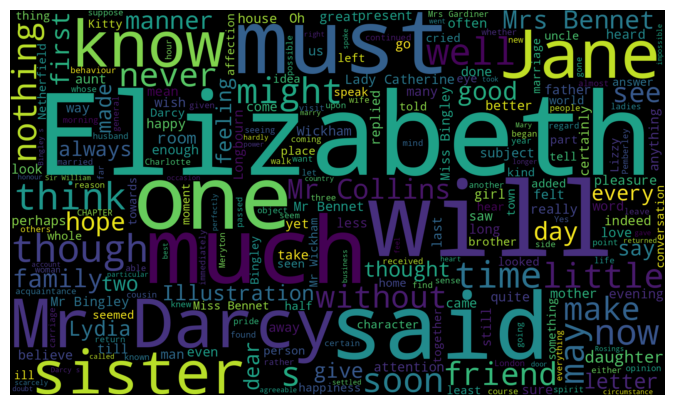

In [ ]:
# create word cloud from 'content'
text_for_wordcloud = " ".join(content.split())
print(f"There are {len(text_for_wordcloud.split())} words.")

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, width=1700, height=1000, max_words=250, background_color="black").generate(text_for_wordcloud)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()